In [5]:
import numpy as np
import tensorflow as tf

def load_synthetic_data2d():
    # Generate a sequence of 2D positions with constant acceleration and added noise
    def generate_linear_trajectory(length, x_start, y_start, ax, ay, noise_std):
        x, y = x_start, y_start
        vx, vy = 0, 0
        trajectory = [(x, y)]
        for _ in range(length - 1):
            vx += ax
            vy += ay
            x += vx + np.random.normal(0, noise_std)
            y += vy + np.random.normal(0, noise_std)
            trajectory.append((x, y))
        return trajectory

    # Generate a sequence of 2D positions representing a circular trajectory with added noise
    def generate_circular_trajectory(length, radius, cx, cy, angular_velocity, noise_std):
        trajectory = []
        for t in range(length):
            angle = angular_velocity * t
            x = cx + radius * np.cos(angle) + np.random.normal(0, noise_std)
            y = cy + radius * np.sin(angle) + np.random.normal(0, noise_std)
            trajectory.append((x, y))
        return trajectory

    # Prepare data for the LSTM
    def get_dataset(seq_len, n_samples, noise_std=0.1):
        traj = list()
        for _ in range(n_samples):
            # Randomly choose between linear or circular trajectory
            if np.random.rand() < 0.5:
                # Generate linear trajectory
                x_start, y_start = np.random.uniform(0, 100), np.random.uniform(0, 100)
                ax, ay = np.random.uniform(-1, 1), np.random.uniform(-1, 1)
                source = generate_linear_trajectory(seq_len, x_start, y_start, ax, ay, noise_std)
            else:
                # Generate circular trajectory
                radius = np.random.uniform(5, 20)
                cx, cy = np.random.uniform(20, 60), np.random.uniform(20, 60)
                angular_velocity = np.random.uniform(0.1, 0.3)
                source = generate_circular_trajectory(seq_len, radius, cx, cy, angular_velocity, noise_std)

            traj.append(source)
        return traj

    ds_pos = get_dataset(15, 640000)
    ds_pose = np.ones((640000,15,51))

    pos_dataset = tf.data.Dataset.from_tensor_slices(np.asarray(ds_pos))
    pose_dataset = tf.data.Dataset.from_tensor_slices(np.asarray(ds_pose))
    zip_ds = tf.data.Dataset.zip((pos_dataset, pose_dataset))
    zip_ds = zip_ds.shuffle(buffer_size=1000, reshuffle_each_iteration=True)
    zip_ds = zip_ds.batch(32).prefetch(tf.data.experimental.AUTOTUNE) 

    # Shuffle, batch and split dataset
    DATASET_SIZE = len(zip_ds)

    train_size = int(0.8 * DATASET_SIZE)
    test_size = int(0.2 * DATASET_SIZE)

    train_dataset = zip_ds.take(train_size)
    test_dataset = zip_ds.skip(train_size)

    return train_dataset, test_dataset

# Example usage
train_dataset, test_dataset = load_synthetic_data2d()


: 

In [6]:
ds2 = np.ones((320000,15,51))

In [7]:
import tensorflow as tf

In [8]:
pos_dataset = tf.data.Dataset.from_tensor_slices(np.asarray(ds))
pose_dataset = tf.data.Dataset.from_tensor_slices(np.asarray(ds2))
zip_ds = tf.data.Dataset.zip((pos_dataset, pose_dataset))
zip_ds = zip_ds.shuffle(buffer_size=1000, reshuffle_each_iteration=True)
zip_ds = zip_ds.batch(32).prefetch(tf.data.experimental.AUTOTUNE) 

# shuffle, batch and split dataset
DATASET_SIZE = len(zip_ds)

train_size = int(0.8 * DATASET_SIZE)
test_size = int(0.2 * DATASET_SIZE)

train_dataset = zip_ds.take(train_size)
test_dataset = zip_ds.skip(train_size)

2024-08-07 12:41:54.374889: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-07 12:41:54.419986: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-07 12:41:54.420633: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-07 12:41:54.422626: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-07 12:41:54.423053: I tensorflow/compile

In [3]:
len(ds)

8000

In [4]:
tf.data.experimental.save(
    ds, path= "test_synthetic_2d"
)
tf.data.experimental.save(
    ds2, path= "train_synthetic_2d"
)

Instructions for updating:
Use `tf.data.Dataset.save(...)` instead.


2024-08-07 16:17:12.315689: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1958400000 exceeds 10% of free system memory.
2024-08-07 16:17:13.962078: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1958400000 exceeds 10% of free system memory.


(50000, 5, 2) (50000, 10, 2) (50000, 10, 2)
Epoch 1/20
782/782 [==============================] - 14s 14ms/step - loss: 1142.3370
Epoch 2/20
782/782 [==============================] - 10s 13ms/step - loss: 252.1065
Epoch 3/20
782/782 [==============================] - 10s 13ms/step - loss: 101.0166
Epoch 4/20
782/782 [==============================] - 10s 13ms/step - loss: 46.9775
Epoch 5/20
782/782 [==============================] - 10s 13ms/step - loss: 23.7014
Epoch 6/20
782/782 [==============================] - 10s 13ms/step - loss: 12.5770
Epoch 7/20
782/782 [==============================] - 10s 13ms/step - loss: 6.8804
Epoch 8/20
782/782 [==============================] - 10s 13ms/step - loss: 3.8695
Epoch 9/20
782/782 [==============================] - 10s 13ms/step - loss: 2.2203
Epoch 10/20
782/782 [==============================] - 10s 13ms/step - loss: 1.2848
Epoch 11/20
782/782 [==============================] - 10s 13ms/step - loss: 0.7817
Epoch 12/20
782/782 [==========

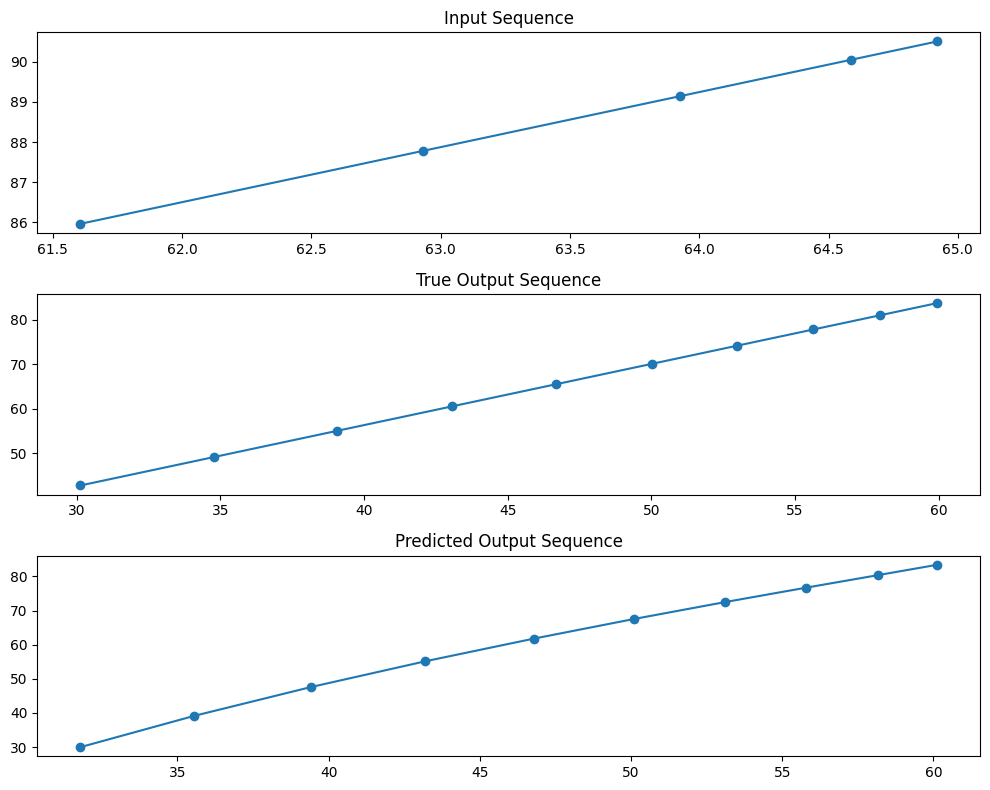

1/1 [==============================] - 0s 21ms/step
Input Sequence: [[80.92048661 38.33222855]
 [80.28784774 41.76241584]
 [78.47317744 44.74123918]
 [75.71526055 46.87672769]
 [72.37699979 47.88788142]]
True Output Sequence: [[68.89766289 47.64164688]
 [65.73508118 46.17042504]
 [63.30540553 43.66780781]
 [61.92834676 40.4631041 ]
 [61.78510625 36.97800741]
 [62.89453243 33.671107  ]
 [65.11064056 30.97754402]
 [68.14182226 29.25175312]
 [71.58921706 28.72082388]
 [74.99919674 29.45461906]]
Predicted Output Sequence: [[69.132195 47.771908]
 [65.93715  46.299   ]
 [63.252186 43.776394]
 [61.315662 40.51993 ]
 [60.284184 36.82798 ]
 [60.23357  33.025417]
 [61.124767 29.468365]
 [62.84038  26.479454]
 [65.17725  24.295818]
 [67.846565 23.053661]]


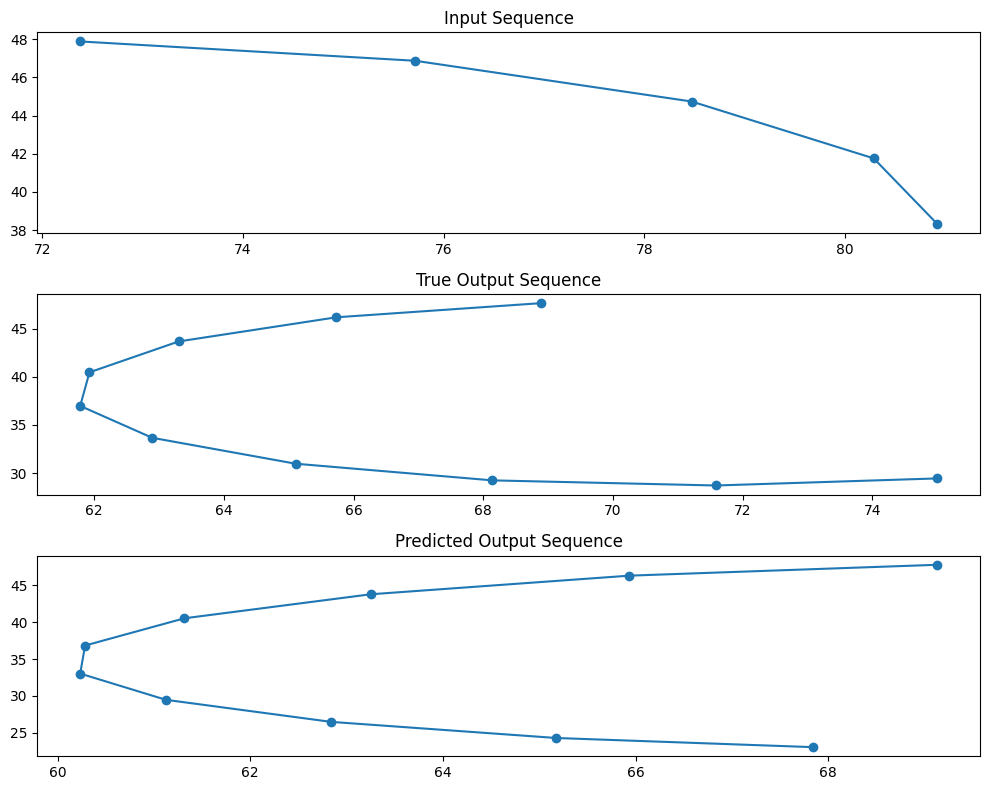

1/1 [==============================] - 0s 34ms/step
Input Sequence: [[52.24959161 68.40576575]
 [51.95395492 70.58361716]
 [51.08844165 72.60384601]
 [49.71569355 74.3202377 ]
 [47.9350636  75.60856794]]
True Output Sequence: [[45.87542538 76.3755935 ]
 [43.68584573 76.56580069]
 [41.52479606 76.16542323]
 [39.54868289 75.20343854]
 [37.90052793 73.7494705 ]
 [36.69961683 71.90875044]
 [36.03286584 69.81450095]
 [35.94853124 67.61829388]
 [36.45271677 65.47908029]
 [37.50893186 63.55168633]]
Predicted Output Sequence: [[46.007305 76.167854]
 [43.99652  76.206696]
 [41.871254 75.79487 ]
 [39.770176 74.88759 ]
 [37.788708 73.50484 ]
 [36.00208  71.69335 ]
 [34.465923 69.53962 ]
 [33.229664 67.15887 ]
 [32.323883 64.66392 ]
 [31.750193 62.141468]]


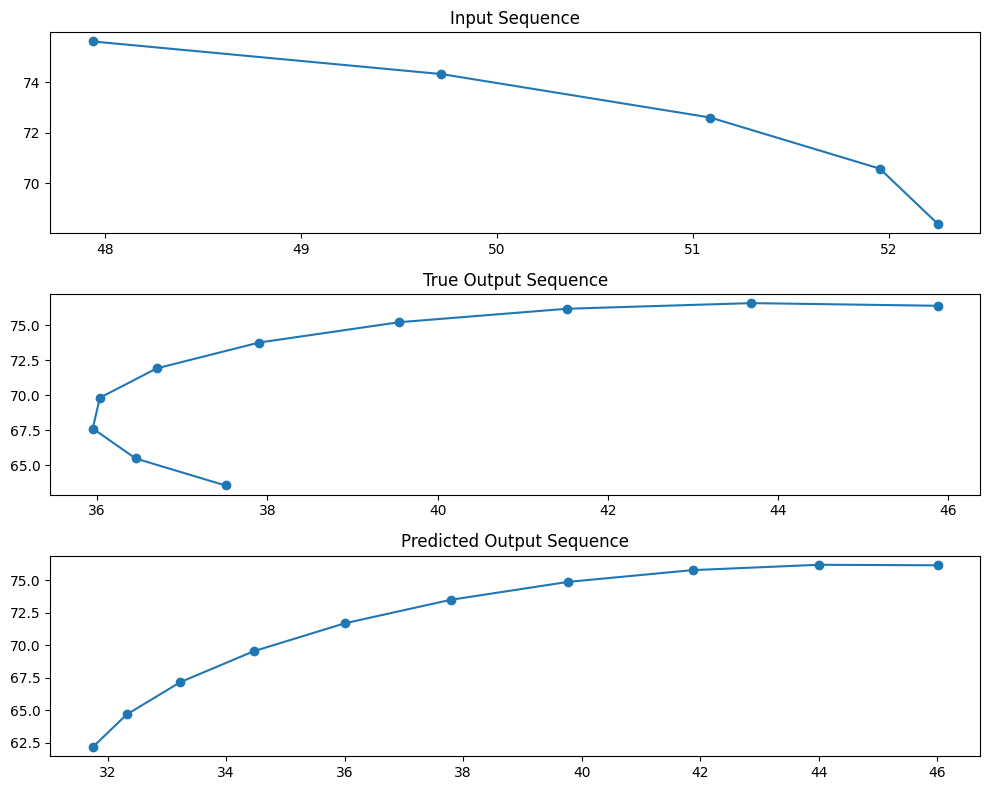

1/1 [==============================] - 0s 22ms/step
Input Sequence: [[87.13568209 65.76131954]
 [87.00638469 67.45856753]
 [86.62147667 69.11664303]
 [85.98984172 70.69727767]
 [85.12605795 72.16399038]]
True Output Sequence: [[84.05006152 73.48292944]
 [82.78668641 74.62365373]
 [81.36509132 75.55983532]
 [79.81808668 76.26986716]
 [78.18137736 76.7373617 ]
 [76.4927386  76.95152917]
 [74.79114419 76.90742658]
 [73.11586694 76.60607182]
 [71.50557224 76.05442016]
 [69.9974257  75.26520372]]
Predicted Output Sequence: [[84.494705 73.43452 ]
 [83.60543  74.42823 ]
 [82.59767  75.10307 ]
 [81.54085  75.39478 ]
 [80.48571  75.25602 ]
 [79.48345  74.6441  ]
 [78.67123  73.5388  ]
 [78.1893   71.96426 ]
 [78.1482   69.99064 ]
 [78.61626  67.7234  ]]


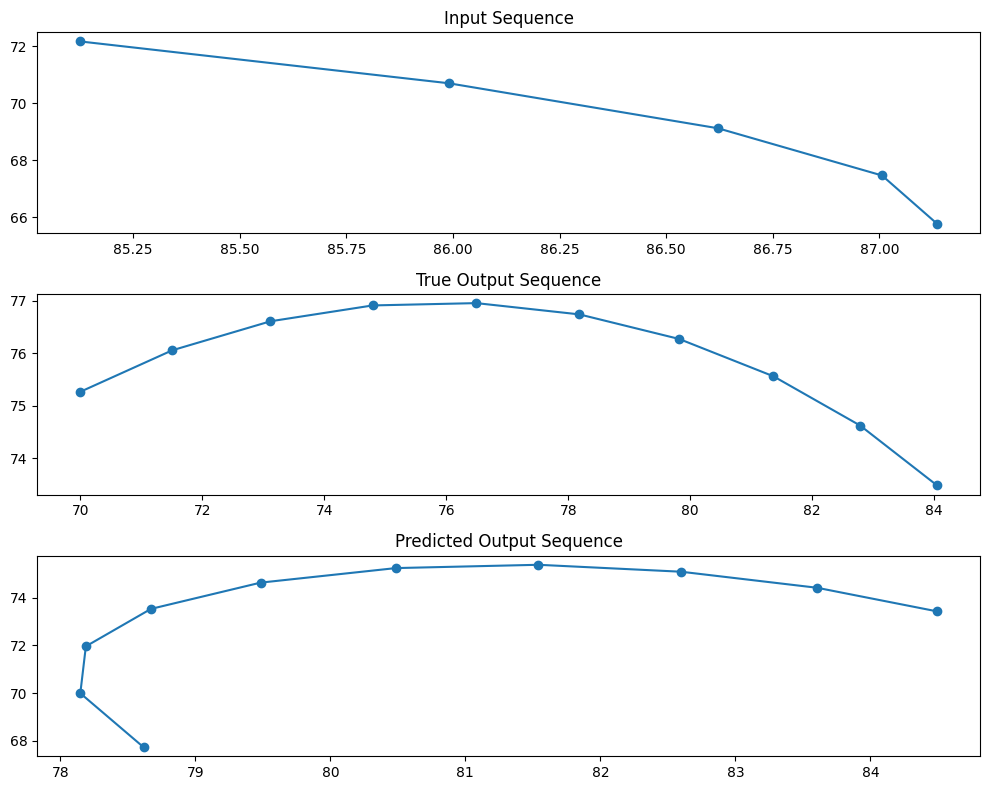

1/1 [==============================] - 0s 20ms/step
Input Sequence: [[83.26231345 56.84586932]
 [82.54063245 60.18052669]
 [80.50474539 62.91839577]
 [77.5190056  64.56949272]
 [74.1177572  64.83832833]]
True Output Sequence: [[70.90970598 63.67679031]
 [68.46898209 61.29275378]
 [67.23239068 58.11287879]
 [67.42123881 54.70625295]
 [69.00172921 51.68254441]
 [71.69100877 49.58289237]
 [75.00778951 48.78306191]
 [78.35848243 49.42619501]
 [81.14342944 51.39719308]
 [82.86422138 54.34331568]]
Predicted Output Sequence: [[71.11804  63.49959 ]
 [68.583725 60.91266 ]
 [66.97759  57.38    ]
 [66.50749  53.33322 ]
 [67.21991  49.3083  ]
 [68.93593  45.716774]
 [71.34817  42.893406]
 [74.07138  41.0359  ]
 [76.70137  40.156723]
 [78.87431  40.115704]]


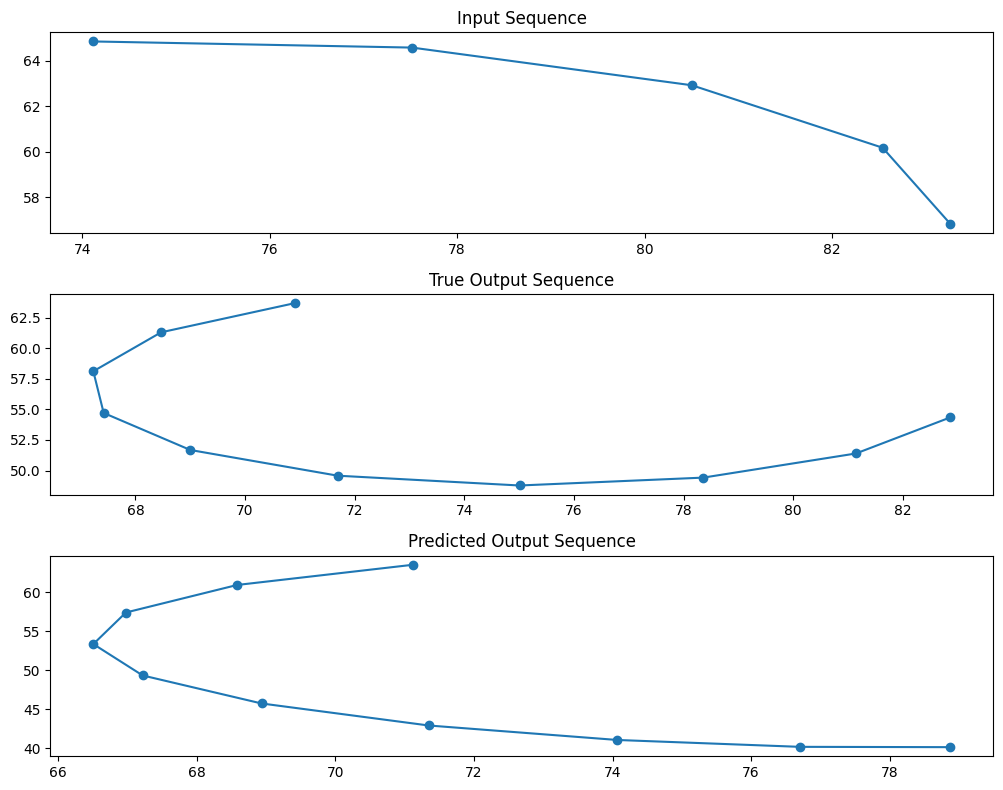

1/1 [==============================] - 0s 25ms/step
Input Sequence: [[44.78767429 82.95048907]
 [44.16042809 83.89802281]
 [42.90593567 85.79309029]
 [41.02419705 88.6356915 ]
 [38.51521223 92.42582646]]
True Output Sequence: [[ 35.3789812   97.16349515]
 [ 31.61550396 102.84869758]
 [ 27.22478051 109.48143376]
 [ 22.20681086 117.06170367]
 [ 16.561595   125.58950731]
 [ 10.28913293 135.0648447 ]
 [  3.38942466 145.48771583]
 [ -4.13752982 156.85812069]
 [-12.2917305  169.1760593 ]
 [-21.07317739 182.44153164]]
Predicted Output Sequence: [[ 3.5312714e+01  9.6585793e+01]
 [ 3.1378935e+01  1.0121050e+02]
 [ 2.6556652e+01  1.0613348e+02]
 [ 2.0991068e+01  1.1137203e+02]
 [ 1.4741769e+01  1.1701641e+02]
 [ 7.7830186e+00  1.2308899e+02]
 [ 6.6917777e-02  1.2969644e+02]
 [-8.4226685e+00  1.3692436e+02]
 [-1.7861036e+01  1.4490927e+02]
 [-2.8493771e+01  1.5381133e+02]]


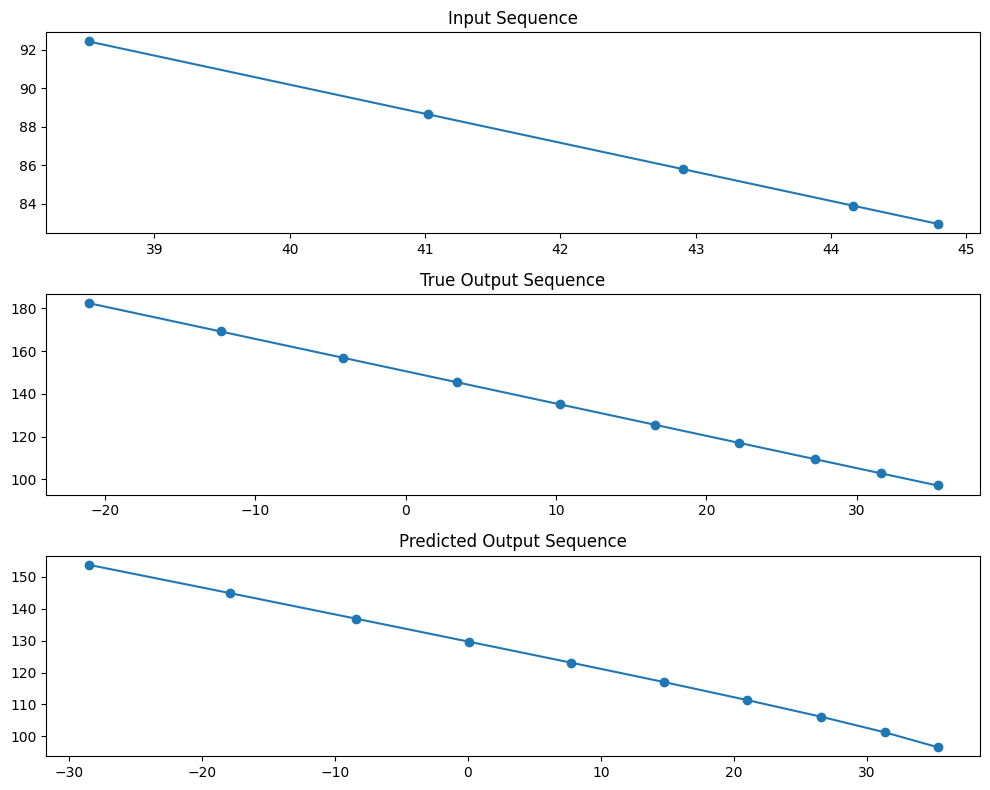

1/1 [==============================] - 0s 23ms/step
Input Sequence: [[57.14724167 22.05959789]
 [56.29405327 21.39801172]
 [54.58767646 20.07483939]
 [52.02811126 18.09008089]
 [48.61535766 15.44373622]]
True Output Sequence: [[ 44.34941565  12.13580539]
 [ 39.23028525   8.1662884 ]
 [ 33.25796644   3.53518523]
 [ 26.43245923  -1.7575041 ]
 [ 18.75376362  -7.71177959]
 [ 10.22187961 -14.32764125]
 [  0.8368072  -21.60508908]
 [ -9.40145361 -29.54412308]
 [-20.49290282 -38.14474324]
 [-32.43754043 -47.40694956]]
Predicted Output Sequence: [[ 44.6384      12.224624  ]
 [ 40.04088      8.517981  ]
 [ 34.5599       4.390119  ]
 [ 28.239494    -0.17213356]
 [ 21.015562    -5.2425113 ]
 [ 12.767971   -10.936258  ]
 [  3.3735704  -17.358307  ]
 [ -7.1742067  -24.564875  ]
 [-18.648134   -32.4354    ]
 [-30.659405   -40.629845  ]]


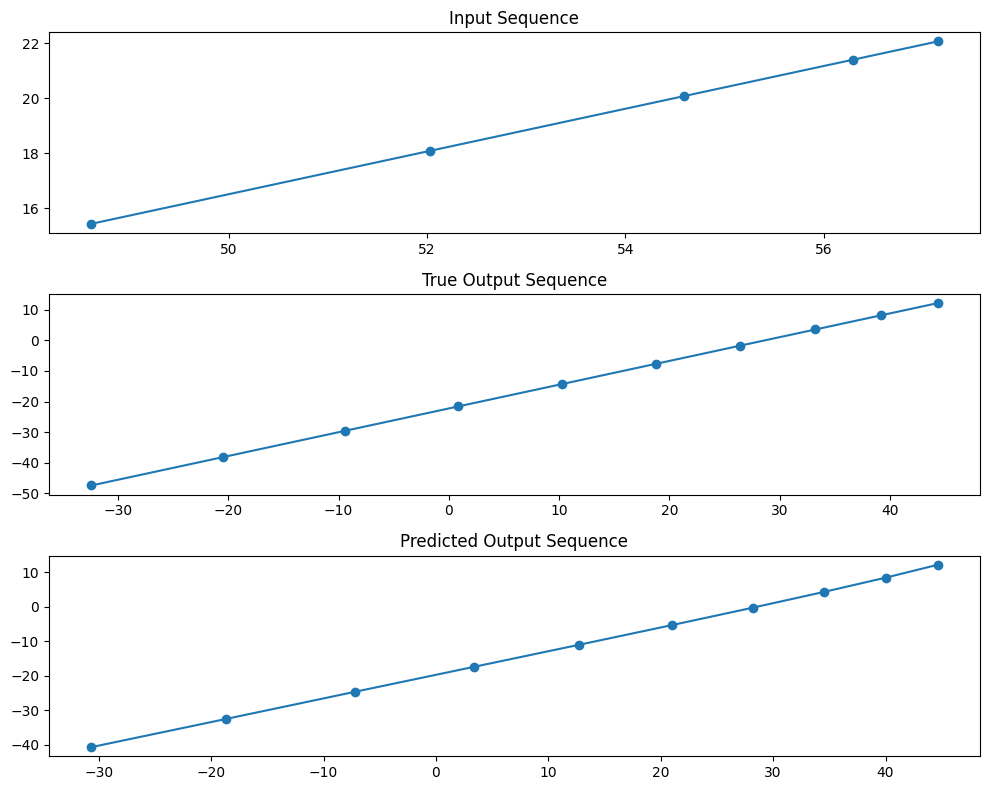

1/1 [==============================] - 0s 20ms/step
Input Sequence: [[37.29987336 49.28176621]
 [36.74545633 51.71145545]
 [35.19196024 53.66015193]
 [32.94692252 54.74208247]
 [30.45478146 54.743063  ]]
True Output Sequence: [[28.20889307 53.6628994 ]
 [26.65386403 51.71542598]
 [26.09753525 49.28617376]
 [26.6500402  46.856049  ]
 [28.20200238 44.90613069]
 [30.44618804 43.82243386]
 [32.93832756 43.81949228]
 [35.18506523 44.89788825]
 [36.74162625 46.84413743]
 [37.29986643 49.27295112]]
Predicted Output Sequence: [[28.257904 53.560932]
 [26.378872 51.56354 ]
 [24.955359 48.952152]
 [24.16509  46.043858]
 [23.959251 43.144264]
 [24.187199 40.519215]
 [24.645077 38.340893]
 [25.071993 36.6925  ]
 [25.214663 35.56177 ]
 [24.86354  34.847263]]


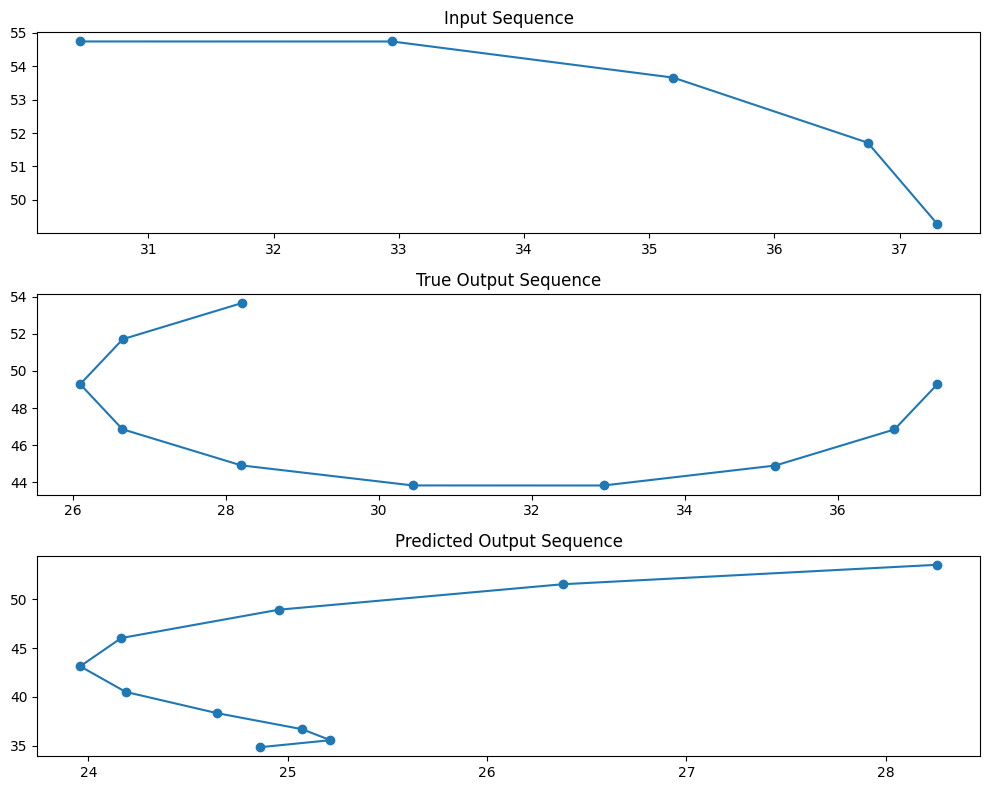

1/1 [==============================] - 0s 22ms/step
Input Sequence: [[39.51108467 42.64027552]
 [38.67894246 46.31779816]
 [36.34464302 49.27882494]
 [32.96298053 50.94645568]
 [29.19280809 50.99578402]]
True Output Sequence: [[25.76867264 49.41719925]
 [23.35770232 46.51825882]
 [22.42962919 42.86376656]
 [23.16527078 39.16573128]
 [25.42130122 36.14464535]
 [28.75817555 34.38911035]
 [32.52576681 34.24115912]
 [35.99003096 35.72961716]
 [38.47602153 38.56448653]
 [39.49939019 42.19344645]]
Predicted Output Sequence: [[26.01088  49.242363]
 [23.611103 46.227966]
 [22.371674 42.39991 ]
 [22.55843  38.387905]
 [24.024704 34.829624]
 [26.391068 32.257854]
 [29.10613  30.97121 ]
 [31.547977 31.016655]
 [33.16968  32.175007]
 [33.580685 34.02354 ]]


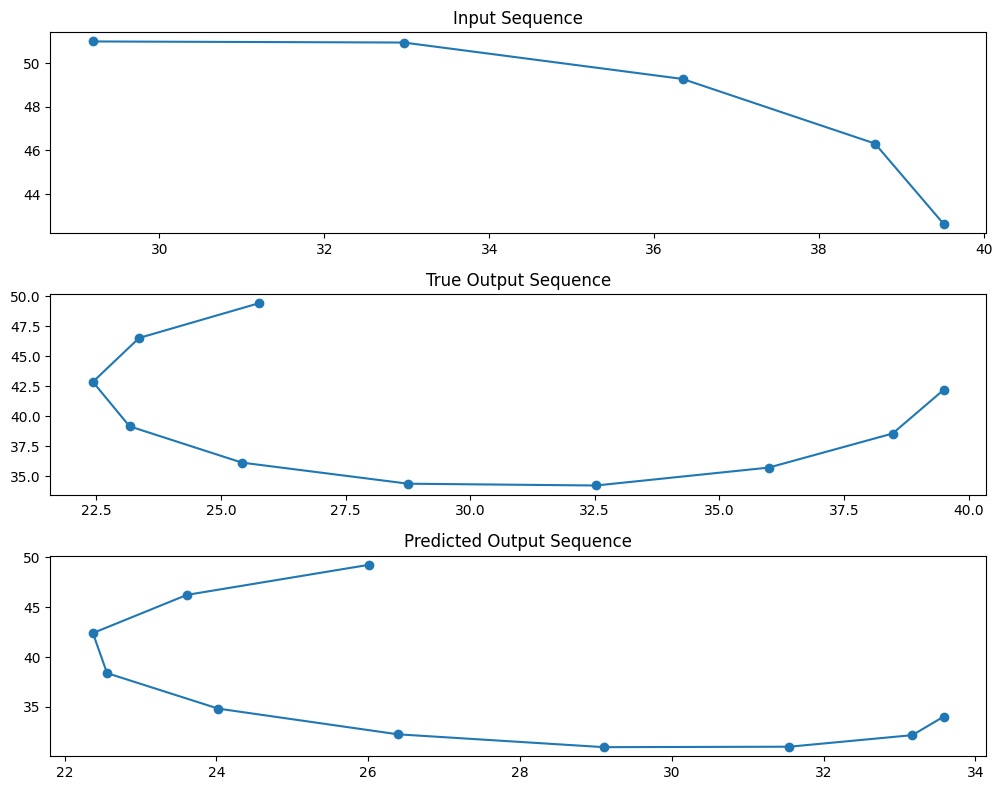

1/1 [==============================] - 0s 20ms/step
Input Sequence: [[ 1.13733928 64.64997025]
 [ 0.93069668 65.53851185]
 [ 0.51741146 67.31559504]
 [-0.10251637 69.98121983]
 [-0.9290868  73.53538623]]
True Output Sequence: [[ -1.96229984  77.97809422]
 [ -3.20215549  83.3093438 ]
 [ -4.64865375  89.52913499]
 [ -6.30179462  96.63746777]
 [ -8.16157809 104.63434215]
 [-10.22800417 113.51975813]
 [-12.50107286 123.29371571]
 [-14.98078416 133.95621488]
 [-17.66713807 145.50725565]
 [-20.56013459 157.94683802]]
Predicted Output Sequence: [[ -1.9734794  78.24317  ]
 [ -3.2630458  83.62989  ]
 [ -4.960282   89.91226  ]
 [ -7.078579   97.11036  ]
 [ -9.62593   105.23716  ]
 [-12.548763  114.440636 ]
 [-15.8709955 124.80169  ]
 [-19.6376    136.27821  ]
 [-23.778347  148.8115   ]
 [-28.116705  162.35225  ]]


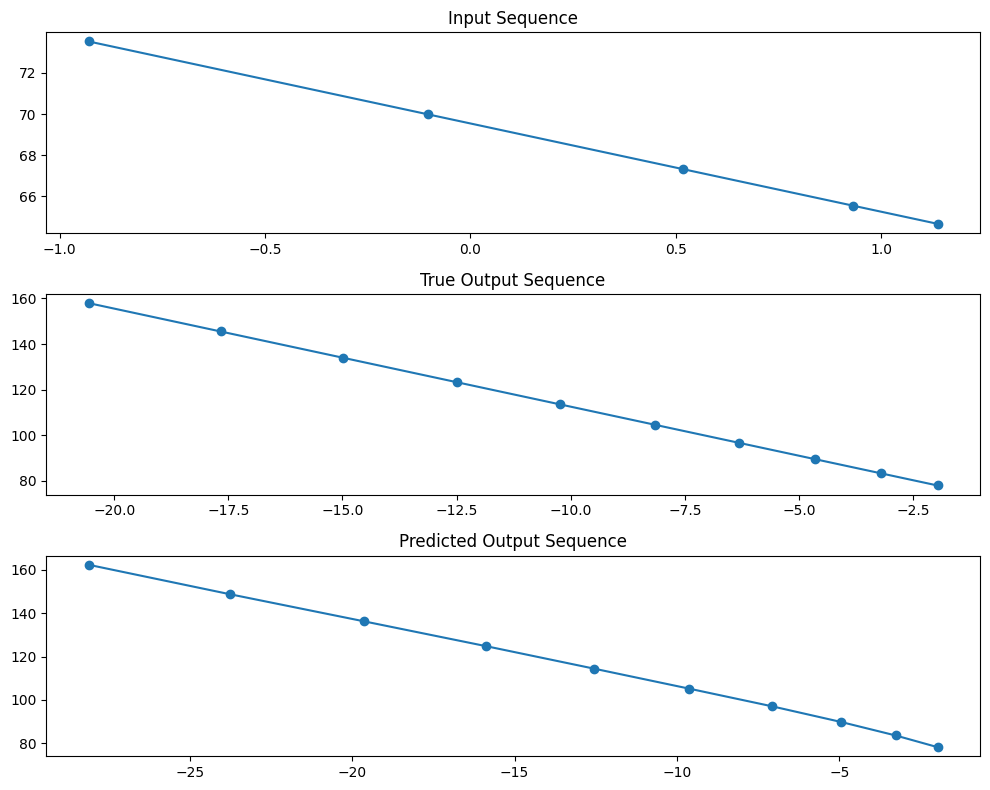

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Generate a sequence of 2D positions with constant acceleration
def generate_linear_trajectory(length, x_start, y_start, ax, ay):
    x, y = x_start, y_start
    vx, vy = 0, 0
    trajectory = [(x, y)]
    for _ in range(length - 1):
        vx += ax
        vy += ay
        x += vx
        y += vy
        trajectory.append((x, y))
    return trajectory

# Generate a sequence of 2D positions representing a circular trajectory
def generate_circular_trajectory(length, radius, cx, cy, angular_velocity):
    trajectory = []
    for t in range(length):
        angle = angular_velocity * t
        x = cx + radius * np.cos(angle)
        y = cy + radius * np.sin(angle)
        trajectory.append((x, y))
    return trajectory

# Prepare data for the LSTM
def get_dataset(history_steps, predict_steps, n_samples):
    X1, X2, y = list(), list(), list()
    for _ in range(n_samples):
        # Randomly choose between linear or circular trajectory
        if np.random.rand() < 0.5:
            # Generate linear trajectory
            x_start, y_start = np.random.uniform(0, 100), np.random.uniform(0, 100)
            ax, ay = np.random.uniform(-1, 1), np.random.uniform(-1, 1)
            source = generate_linear_trajectory(history_steps + predict_steps, x_start, y_start, ax, ay)
        else:
            # Generate circular trajectory
            radius = np.random.uniform(5, 20)
            cx, cy = np.random.uniform(20, 80), np.random.uniform(20, 80)
            angular_velocity = np.random.uniform(0.1, 0.5)
            source = generate_circular_trajectory(history_steps + predict_steps, radius, cx, cy, angular_velocity)

        # Define input sequence (first 5 steps)
        input_seq = source[:history_steps]
        # Define target sequence (next 10 steps)
        target = source[history_steps:]
        # Create input target sequence with a zeroed start
        target_in = [(0, 0)] + target[:-1]
        # Store
        X1.append(input_seq)
        X2.append(target_in)
        y.append(target)
    return array(X1), array(X2), array(y)

# Returns train, inference_encoder and inference_decoder models
def define_models(n_input, n_output, n_units):
    # Define training encoder
    encoder_inputs = Input(shape=(None, n_input))
    encoder = LSTM(n_units, return_state=True)
    encoder_outputs, state_h, state_c = encoder(encoder_inputs)
    encoder_states = [state_h, state_c]
    
    # Define training decoder
    decoder_inputs = Input(shape=(None, n_input))
    decoder_lstm = LSTM(n_units, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
    decoder_dense = Dense(n_output)
    decoder_outputs = decoder_dense(decoder_outputs)
    
    # Define the model
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    
    # Define inference encoder
    encoder_model = Model(encoder_inputs, encoder_states)
    
    # Define inference decoder
    decoder_state_input_h = Input(shape=(n_units,))
    decoder_state_input_c = Input(shape=(n_units,))
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
    decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
    decoder_states = [state_h, state_c]
    decoder_outputs = decoder_dense(decoder_outputs)
    decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)
    
    return model, encoder_model, decoder_model

# Generate target given source sequence
def predict_sequence(infenc, infdec, source, n_steps):
    # Encode
    state = infenc.predict(source)
    # Start of sequence input
    target_seq = array([[0.0, 0.0]]).reshape(1, 1, 2)
    # Collect predictions
    output = list()
    for t in range(n_steps):
        # Predict next position
        yhat, h, c = infdec.predict([target_seq] + state)
        # Store prediction
        output.append(yhat[0,0,:])
        # Update state
        state = [h, c]
        # Update target sequence
        target_seq = yhat.reshape(1, 1, 2)
    return array(output)

# Plot the sequences
def plot_sequences(input_seq, true_seq, predicted_seq):
    fig, ax = plt.subplots(3, 1, figsize=(10, 8))
    
    ax[0].set_title("Input Sequence")
    ax[0].plot([pos[0] for pos in input_seq], [pos[1] for pos in input_seq], marker='o')
    
    ax[1].set_title("True Output Sequence")
    ax[1].plot([pos[0] for pos in true_seq], [pos[1] for pos in true_seq], marker='o')
    
    ax[2].set_title("Predicted Output Sequence")
    ax[2].plot([pos[0] for pos in predicted_seq], [pos[1] for pos in predicted_seq], marker='o')
    
    plt.tight_layout()
    plt.show()

# Configure problem
history_steps = 5
predict_steps = 10
n_features = 2

# Define model
train, infenc, infdec = define_models(n_features, n_features, 128)
train.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Generate training dataset
X1, X2, y = get_dataset(history_steps, predict_steps, 50000)
print(X1.shape, X2.shape, y.shape)

# Train model
train.fit([X1, X2], y, epochs=20, batch_size=64)

# Spot check some examples
for _ in range(10):
    X1, X2, y = get_dataset(history_steps, predict_steps, 1)
    target = predict_sequence(infenc, infdec, X1, predict_steps)
    input_seq = X1[0]
    true_seq = y[0]
    predicted_seq = target
    print(f'Input Sequence: {input_seq}')
    print(f'True Output Sequence: {true_seq}')
    print(f'Predicted Output Sequence: {predicted_seq}')
    plot_sequences(input_seq, true_seq, predicted_seq)


In [41]:
train.save_weights('path_to_save_weights.h5')

In [15]:
import tensorflow as tf

In [10]:
%matplotlib inline

In [62]:

# Prepare data for training
def prepare_data_2d(dataset, history_steps, predict_steps):
    X1_list, X2_list, y_list = [], [], []
    
    for batch_x1, _ in dataset:
        batch_x1 = batch_x1.numpy()  # Convert Tensor to NumPy array
        batch_size = batch_x1.shape[0]
        
        for i in range(batch_size):
            sequence = batch_x1[i]
            
            # Take only the first two dimensions (2D positions)
            sequence = sequence[:, :2]  # Ensure sequence has only 2 features
            
            if len(sequence) >= history_steps + predict_steps:
                input_seq = sequence[:history_steps]
                target_seq = sequence[history_steps:history_steps + predict_steps]
                
                # Create target_in (shifted target sequence with a zeroed start)
                target_in = np.zeros((predict_steps, 2))
                target_in[1:] = target_seq[:-1]  # Shift target sequence
                
                # Store sequences
                X1_list.append(input_seq)
                X2_list.append(target_in)
                y_list.append(target_seq)
    
    X1 = np.array(X1_list)
    X2 = np.array(X2_list)
    y = np.array(y_list)
    
    return X1, X2, y
history_steps = 8
predict_steps = 7
X1, X2, y = prepare_data_2d(loaded, history_steps, predict_steps)
print(X1.shape, X2.shape,  y.shape)


from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X1_scaled = scaler.fit_transform(X1.reshape(-1, X1.shape[-1])).reshape(X1.shape)
y_scaled = scaler.transform(y.reshape(-1, y.shape[-1])).reshape(y.shape)
print(X1_scaled.shape, y_scaled.shape)

(211456, 8, 2) (211456, 7, 2) (211456, 7, 2)
(211456, 8, 2) (211456, 7, 2)


In [67]:
train, infenc, infdec = define_models(n_input=2, n_output=2, n_units=128)
#train.load_weights('path_to_save_weights.h5')
train.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Prepare decoder inputs as zero sequences of shape (batch_size, 1, n_features) for training
#decoder_inputs = np.zeros((X1.shape[0], 1, 2))  # Initialize decoder inputs with zeros

# Fine-tune the model on the prepared data
#train.fit([X1, decoder_inputs], y, epochs=15, batch_size=64)

train.fit([X1, X2], y, epochs=15, batch_size=64)

Epoch 1/15
3304/3304 [==============================] - 27s 8ms/step - loss: 138518.0312
Epoch 2/15
3304/3304 [==============================] - 26s 8ms/step - loss: 60920.9922
Epoch 3/15
3304/3304 [==============================] - 25s 8ms/step - loss: 28093.5547
Epoch 4/15
3304/3304 [==============================] - 25s 8ms/step - loss: 12432.3955
Epoch 5/15
3304/3304 [==============================] - 25s 8ms/step - loss: 5417.3003
Epoch 6/15
3304/3304 [==============================] - 25s 8ms/step - loss: 2388.1675
Epoch 7/15
3304/3304 [==============================] - 26s 8ms/step - loss: 1151.5690
Epoch 8/15
3304/3304 [==============================] - 26s 8ms/step - loss: 758.1276
Epoch 9/15
3304/3304 [==============================] - 25s 8ms/step - loss: 543.6147
Epoch 10/15
3304/3304 [==============================] - 26s 8ms/step - loss: 448.9776
Epoch 11/15
3304/3304 [==============================] - 26s 8ms/step - loss: 397.7092
Epoch 12/15
3304/3304 [=================

[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 16222427923489919739


1/1 [==============================] - 0s 44ms/step
Input Sequence:
[[ 96.084 -82.773]
 [ 96.903 -88.934]
 [ 97.721 -95.095]
 [ 88.042 -41.261]
 [ 87.964 -33.948]
 [ 87.886 -26.635]
 [ 87.502 -19.169]
 [ 87.118 -11.703]]
True Output Sequence:
[[86.494 -4.158]
 [85.87   3.386]
 [85.072 10.935]
 [84.273 18.483]
 [83.365 25.963]
 [82.457 33.443]
 [81.504 40.778]]
Predicted Output Sequence:
[[56.41053  32.510105]
 [59.345955 75.80507 ]
 [60.43676  64.48427 ]
 [77.223114 62.356396]
 [84.6862   59.825085]
 [85.30761  63.53442 ]
 [81.871765 67.70378 ]]


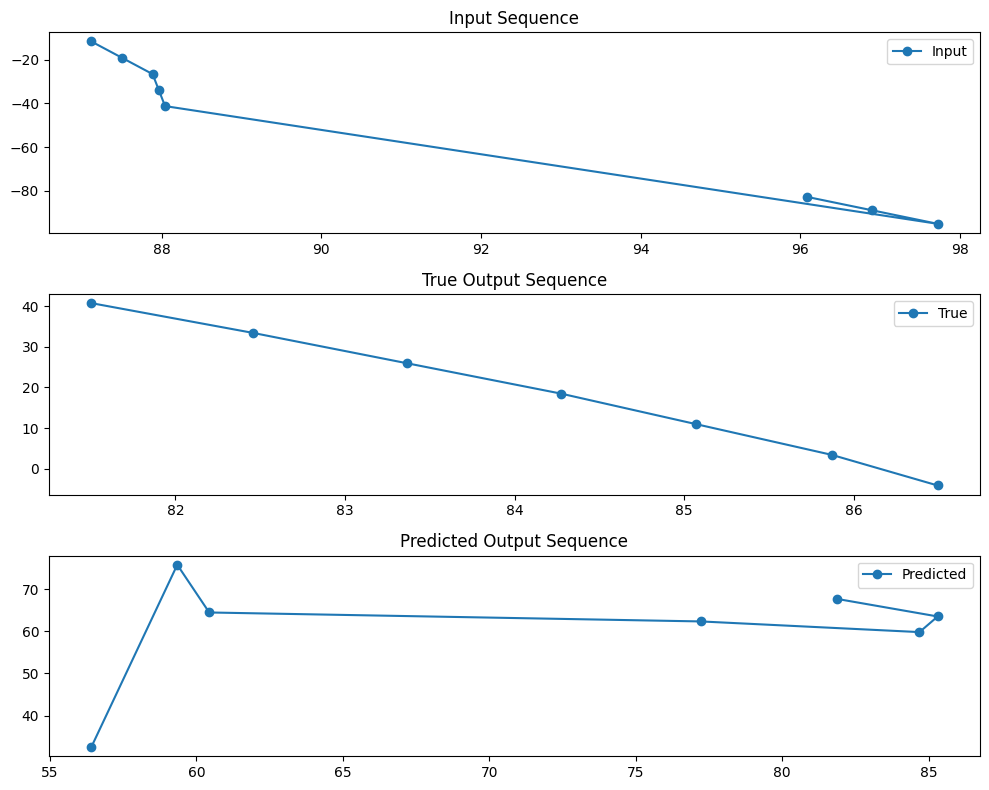

1/1 [==============================] - 0s 23ms/step
Input Sequence:
[[148.127 129.763]
 [148.322 129.874]
 [148.518 129.986]
 [148.724 130.108]
 [148.931 130.23 ]
 [149.146 130.36 ]
 [149.362 130.49 ]
 [149.584 130.626]]
True Output Sequence:
[[149.807 130.763]
 [150.036 130.904]
 [150.265 131.046]
 [150.498 131.19 ]
 [150.73  131.335]
 [150.965 131.48 ]
 [151.2   131.626]]
Predicted Output Sequence:
[[150.89827 142.37369]
 [150.91365 141.1905 ]
 [154.11525 141.34222]
 [151.1108  154.39717]
 [149.93253 163.33849]
 [151.11987 172.58905]
 [152.09808 182.05945]]


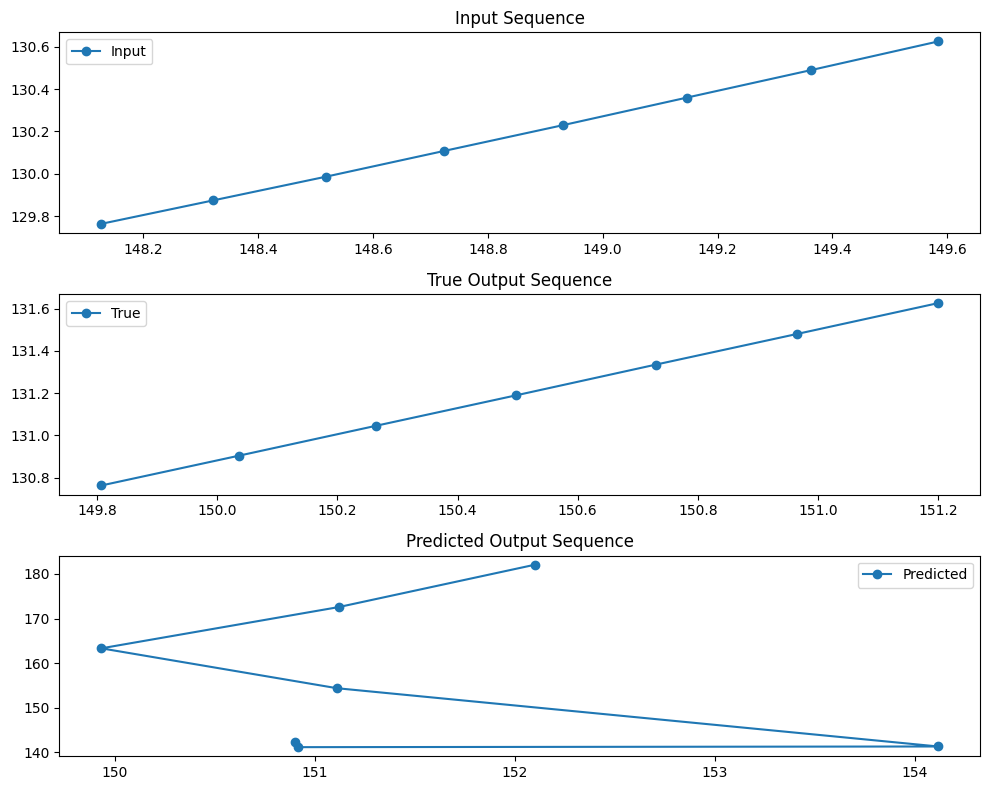

1/1 [==============================] - 0s 20ms/step
Input Sequence:
[[154.345 133.429]
 [154.539 133.52 ]
 [154.733 133.61 ]
 [154.914 133.686]
 [155.096 133.761]
 [155.264 133.82 ]
 [155.431 133.879]
 [155.582 133.92 ]]
True Output Sequence:
[[155.733 133.96 ]
 [155.866 133.98 ]
 [156.    134.   ]
 [156.114 133.999]
 [156.229 133.998]
 [156.324 133.978]
 [156.42  133.958]]
Predicted Output Sequence:
[[153.71255 146.34366]
 [152.99118 142.90036]
 [154.92958 141.72342]
 [152.15094 154.15875]
 [151.02704 163.11617]
 [152.02971 172.30173]
 [152.94954 181.65292]]


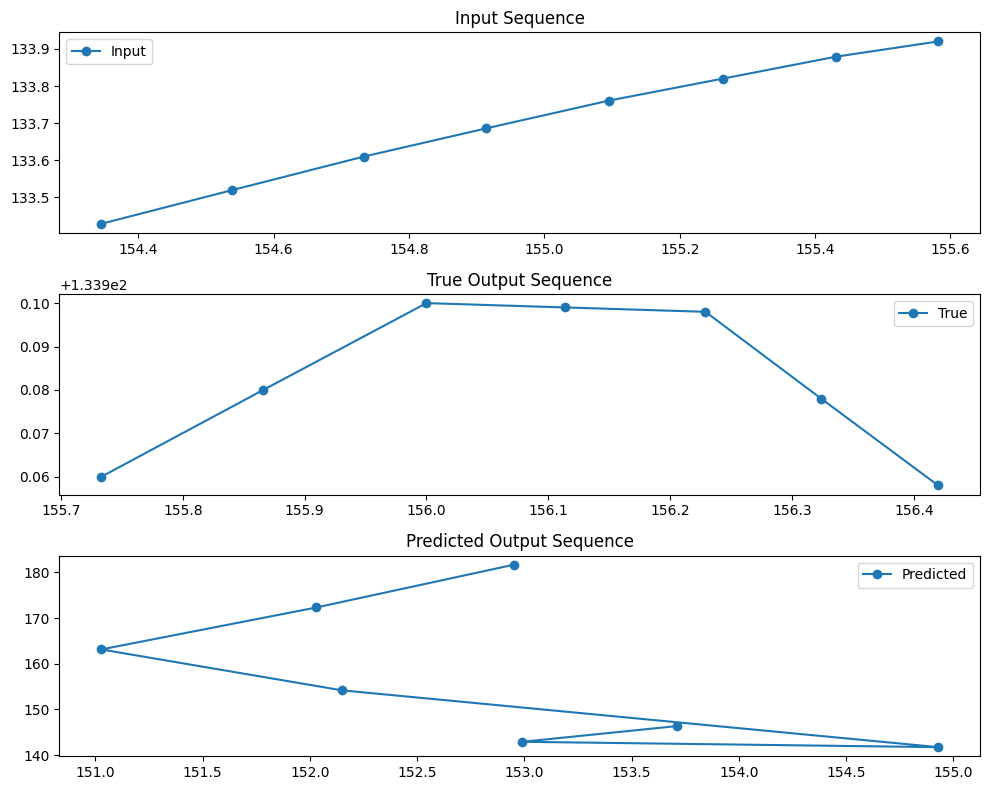

1/1 [==============================] - 0s 25ms/step
Input Sequence:
[[152.459 132.952]
 [152.23  132.976]
 [152.    133.   ]
 [151.927 133.604]
 [151.854 134.207]
 [151.973 135.086]
 [152.092 135.964]
 [152.438 136.726]]
True Output Sequence:
[[152.784 137.489]
 [153.392 137.744]
 [154.    138.   ]
 [154.873 137.478]
 [155.746 136.955]
 [156.754 135.866]
 [157.761 134.778]]
Predicted Output Sequence:
[[153.96718 145.63547]
 [152.47287 143.72078]
 [153.44153 143.29416]
 [150.21388 155.71782]
 [149.19847 164.72691]
 [150.5384  174.0834 ]
 [151.68307 183.73032]]


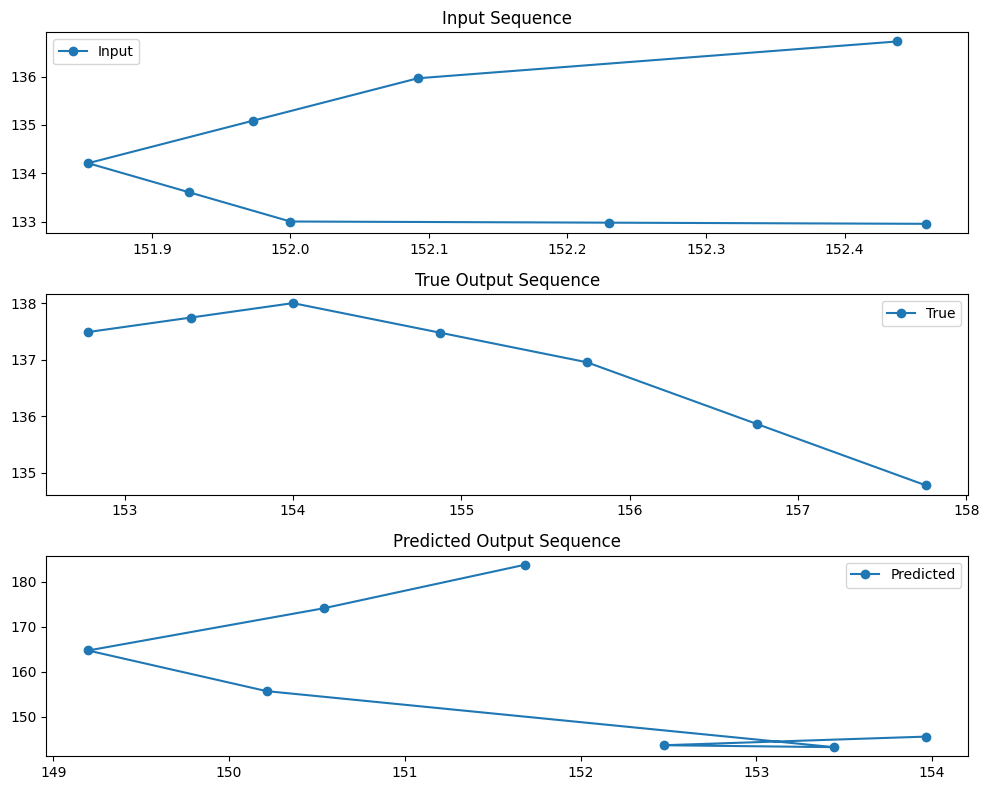

1/1 [==============================] - 0s 24ms/step
Input Sequence:
[[116.15   39.611]
 [114.     35.   ]
 [111.898  30.51 ]
 [109.796  26.02 ]
 [107.742  21.654]
 [105.687  17.288]
 [103.68   13.043]
 [101.672   8.799]]
True Output Sequence:
[[ 99.712   4.673]
 [ 97.752   0.547]
 [ 95.837  -3.467]
 [ 93.922  -7.481]
 [ 92.052 -11.386]
 [ 90.182 -15.29 ]
 [ 88.356 -19.092]]
Predicted Output Sequence:
[[111.150795  27.154873]
 [119.35636   19.388111]
 [123.201904  16.792156]
 [122.771545  19.426517]
 [118.80696   24.16402 ]
 [117.090416  26.44028 ]
 [117.83676   30.908688]]


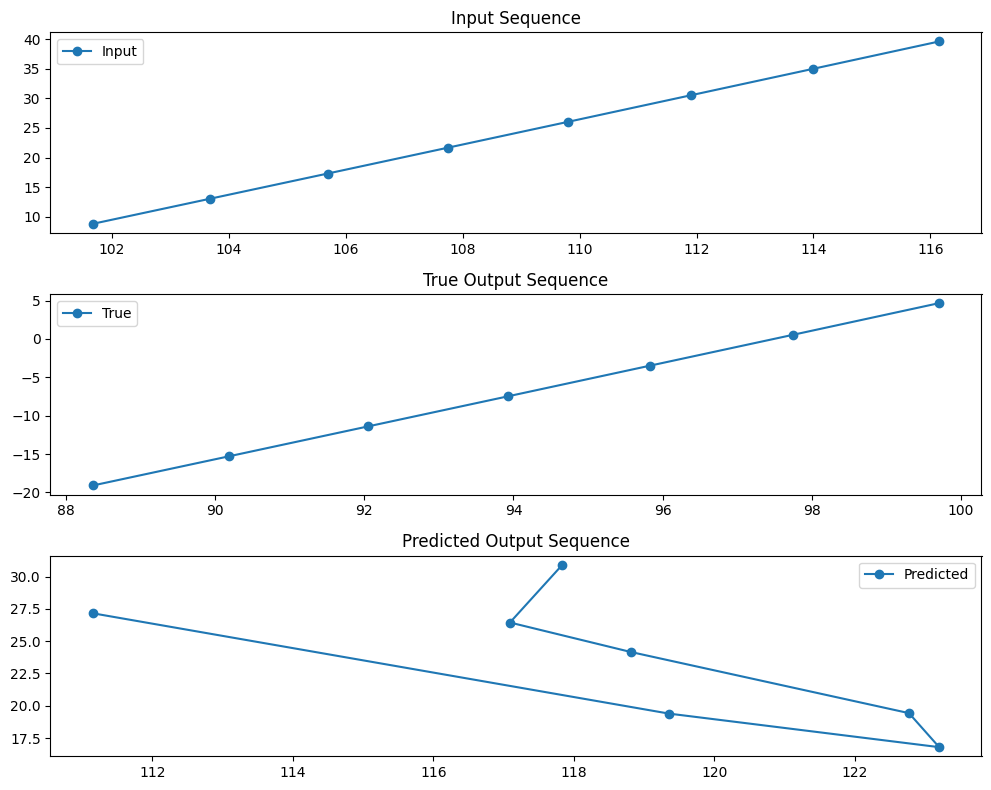

1/1 [==============================] - 0s 21ms/step
Input Sequence:
[[152.784 137.489]
 [153.392 137.744]
 [154.    138.   ]
 [154.873 137.478]
 [155.746 136.955]
 [156.754 135.866]
 [157.761 134.778]
 [158.74  133.454]]
True Output Sequence:
[[159.72  132.13 ]
 [160.508 130.903]
 [161.297 129.676]
 [161.731 128.877]
 [162.165 128.078]
 [162.082 128.039]
 [162.    128.   ]]
Predicted Output Sequence:
[[154.99751 146.9704 ]
 [154.15207 142.89815]
 [155.68723 141.41014]
 [153.03091 153.55286]
 [151.8152  162.4145 ]
 [152.51279 171.54086]
 [153.21614 180.81012]]


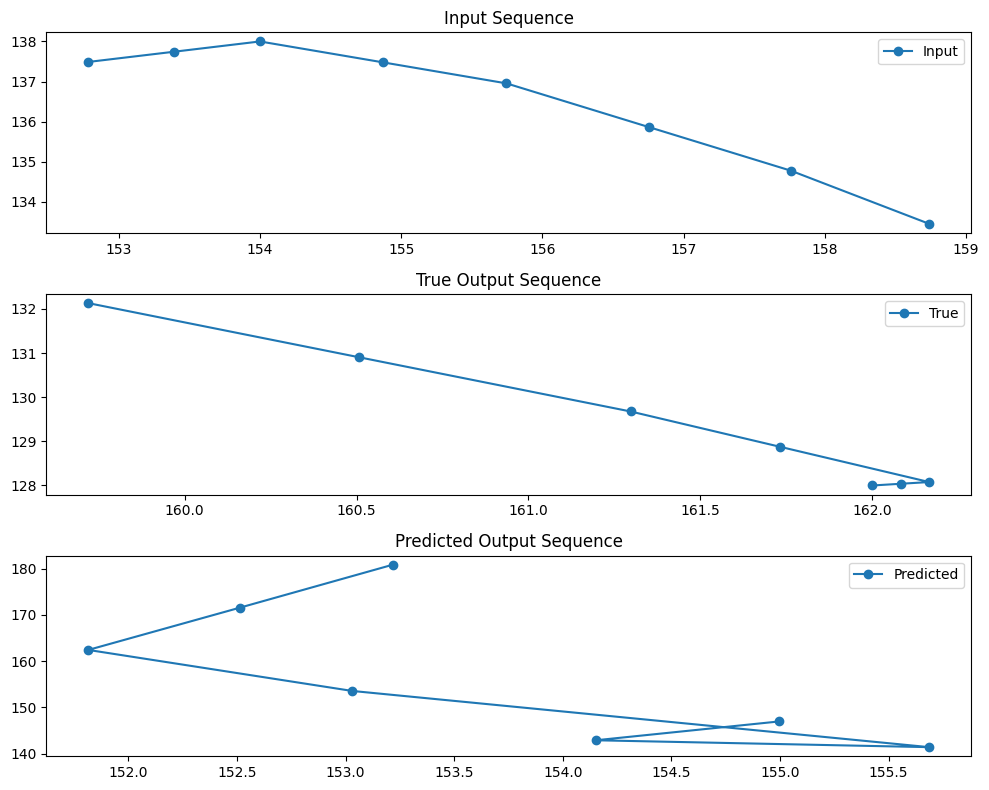

1/1 [==============================] - 0s 33ms/step
Input Sequence:
[[149.807 130.763]
 [150.036 130.904]
 [150.265 131.046]
 [150.498 131.19 ]
 [150.73  131.335]
 [150.965 131.48 ]
 [151.2   131.626]
 [151.436 131.77 ]]
True Output Sequence:
[[151.672 131.915]
 [151.907 132.058]
 [152.142 132.201]
 [152.374 132.339]
 [152.606 132.477]
 [152.834 132.61 ]
 [153.062 132.742]]
Predicted Output Sequence:
[[151.87524 144.02779]
 [151.56696 141.91449]
 [154.32869 141.50275]
 [151.40242 154.3279 ]
 [150.23663 163.27948]
 [151.34737 172.51476]
 [152.30383 181.95535]]


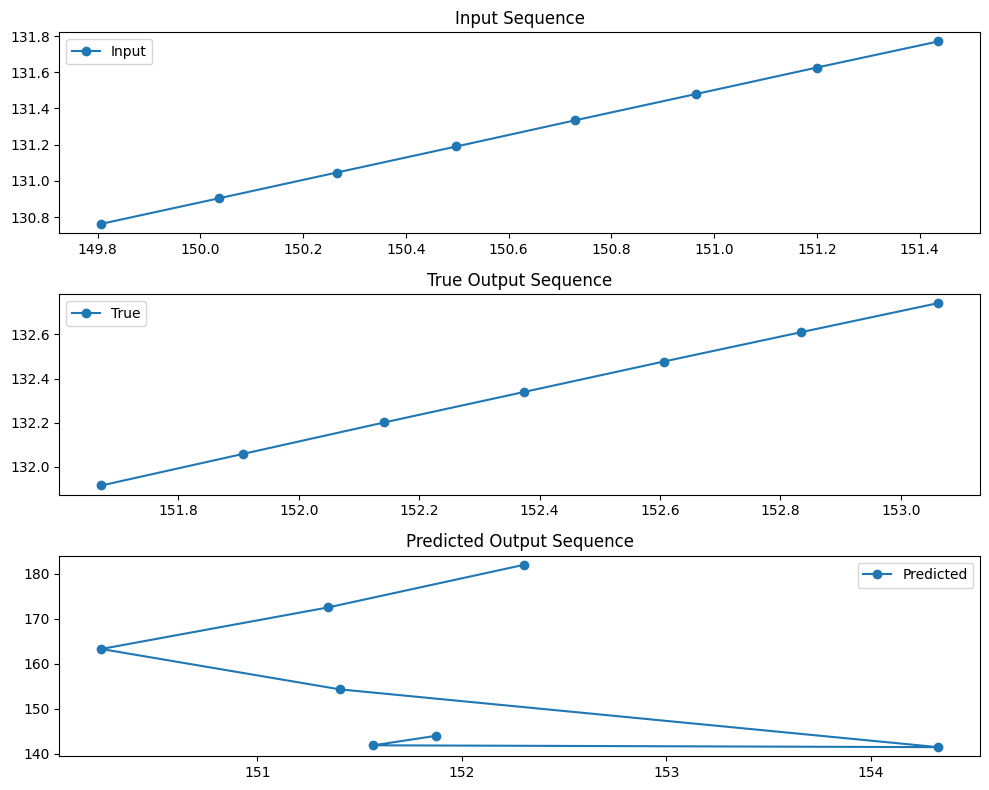

1/1 [==============================] - 0s 27ms/step
Input Sequence:
[[138.953  87.079]
 [136.546  82.352]
 [134.19   77.574]
 [131.834  72.795]
 [129.529  68.002]
 [127.224  63.209]
 [124.97   58.438]
 [122.717  53.668]]
True Output Sequence:
[[120.508  48.944]
 [118.3    44.221]
 [116.15   39.611]
 [114.     35.   ]
 [111.898  30.51 ]
 [109.796  26.02 ]
 [107.742  21.654]]
Predicted Output Sequence:
[[118.09091   34.30239 ]
 [110.800545  41.754436]
 [107.71667   46.393948]
 [104.18221   58.196022]
 [104.829346  64.79681 ]
 [103.6286    73.3466  ]
 [101.76145   81.316284]]


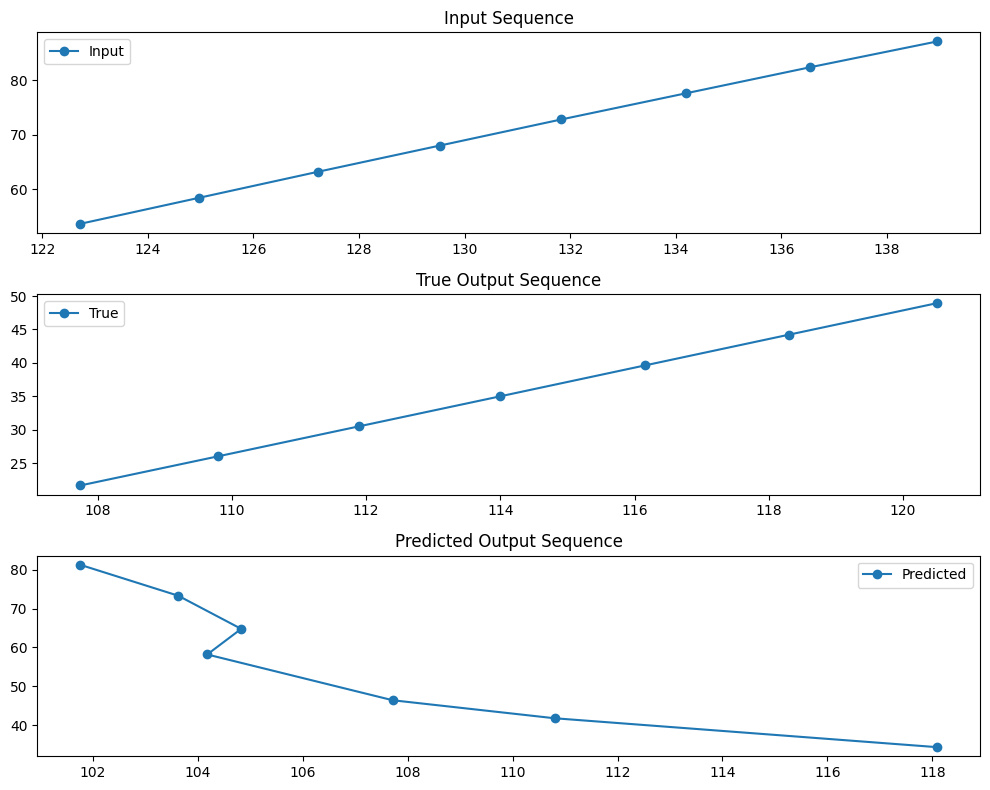

1/1 [==============================] - 0s 24ms/step
Input Sequence:
[[156.229 133.998]
 [156.324 133.978]
 [156.42  133.958]
 [156.497 133.922]
 [156.574 133.886]
 [156.632 133.838]
 [156.69  133.789]
 [156.73  133.732]]
True Output Sequence:
[[156.769 133.675]
 [156.79  133.611]
 [156.812 133.547]
 [156.816 133.48 ]
 [156.82  133.413]
 [156.806 133.346]
 [156.792 133.28 ]]
Predicted Output Sequence:
[[154.22102 146.33755]
 [153.4584  142.58913]
 [155.33784 141.37076]
 [152.63986 153.80133]
 [151.53209 162.75735]
 [152.50877 171.90048]
 [153.40912 181.17014]]


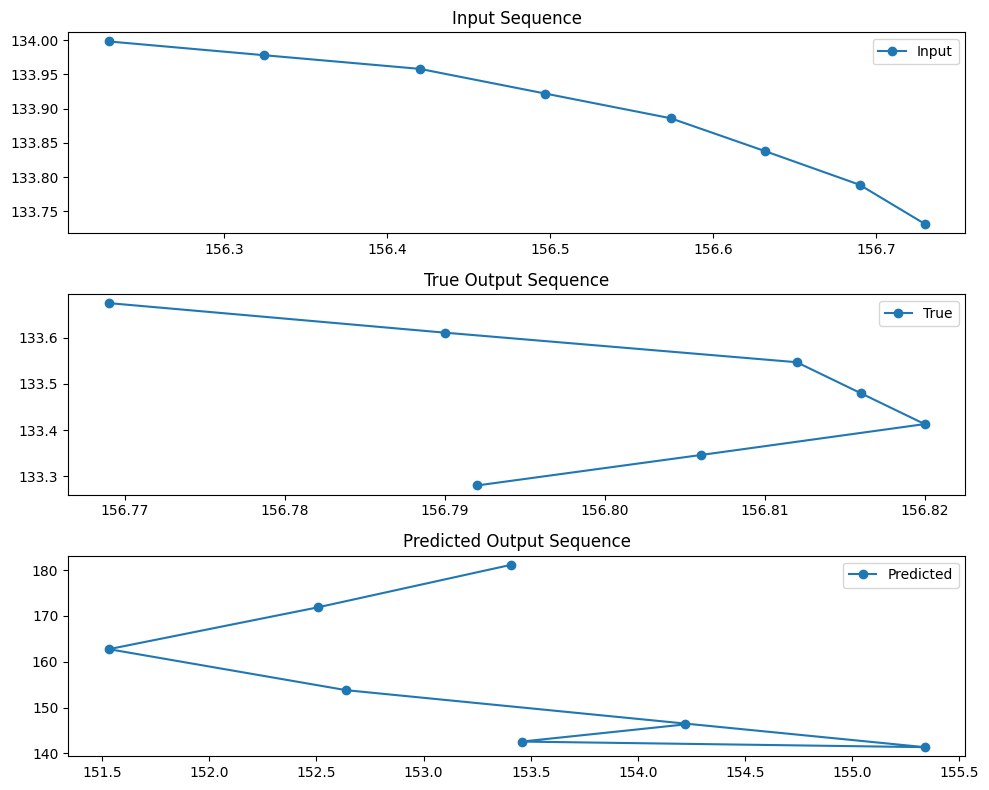

1/1 [==============================] - 0s 24ms/step
Input Sequence:
[[120.508  48.944]
 [118.3    44.221]
 [116.15   39.611]
 [114.     35.   ]
 [111.898  30.51 ]
 [109.796  26.02 ]
 [107.742  21.654]
 [105.687  17.288]]
True Output Sequence:
[[103.68   13.043]
 [101.672   8.799]
 [ 99.712   4.673]
 [ 97.752   0.547]
 [ 95.837  -3.467]
 [ 93.922  -7.481]
 [ 92.052 -11.386]]
Predicted Output Sequence:
[[115.91348   31.326138]
 [132.25764   27.19521 ]
 [149.07953   25.60186 ]
 [156.35051   18.180355]
 [146.25131   17.62859 ]
 [138.97687   23.126102]
 [137.27383   28.992886]]


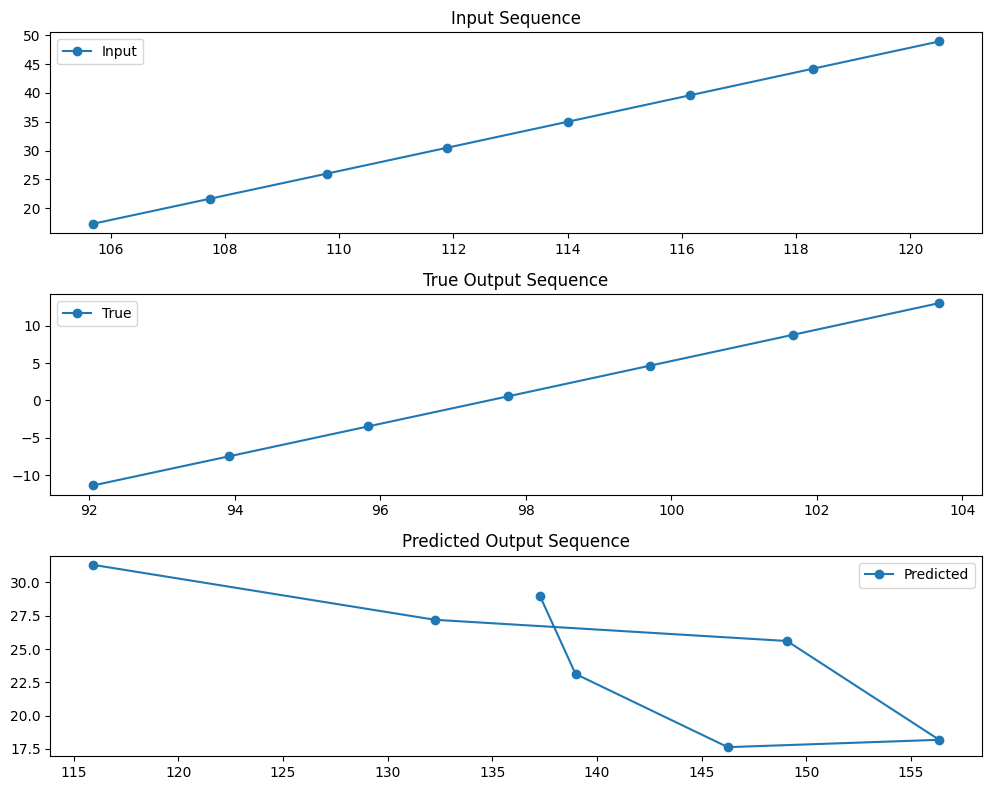

In [68]:
# Spot check some examples
for batch_x1, _ in loaded.take(1):
    batch_x1 = batch_x1.numpy()  # Convert Tensor to NumPy array
    for i in range(10):
        input_seq = batch_x1[i][:history_steps, :2]  # Ensure the input sequence has 2 features
        true_seq = batch_x1[i][history_steps:history_steps + predict_steps, :2]  # Ensure the true sequence has 2 features
        
        # Add an extra dimension to match the model's expected input shape
        input_seq_expanded = input_seq[np.newaxis, :, :]  # Shape should be (1, history_steps, 2)

        # Predicting sequence using the model
        predicted_seq = predict_sequence(infenc, infdec, input_seq_expanded, predict_steps)

        print(f'Input Sequence:\n{input_seq}')
        print(f'True Output Sequence:\n{true_seq}')
        print(f'Predicted Output Sequence:\n{predicted_seq}')

        # Plot sequences
        def plot_sequences(input_seq, true_seq, predicted_seq):
            fig, ax = plt.subplots(3, 1, figsize=(10, 8))

            ax[0].set_title("Input Sequence")
            ax[0].plot(input_seq[:, 0], input_seq[:, 1], marker='o', label='Input')
            ax[0].legend()

            ax[1].set_title("True Output Sequence")
            ax[1].plot(true_seq[:, 0], true_seq[:, 1], marker='o', label='True')
            ax[1].legend()

            ax[2].set_title("Predicted Output Sequence")
            ax[2].plot(predicted_seq[:, 0], predicted_seq[:, 1], marker='o', label='Predicted')
            ax[2].legend()

            plt.tight_layout()
            plt.show()

        plot_sequences(input_seq, true_seq, predicted_seq)

# Data Visualisation

In [44]:
# Prepare data for training
def prepare_data_2d(dataset, history_steps, predict_steps):
    X1_list, y_list = [], []
    for batch_x1, _ in dataset:
        batch_x1 = batch_x1.numpy()  # Convert Tensor to NumPy array
        batch_size = batch_x1.shape[0]
        for i in range(batch_size):
            sequence = batch_x1[i]
            
            # Take only the first two dimensions (2D positions)
            sequence = sequence[:, :2]  # Ensure sequence has only 2 features
            
            if len(sequence) >= history_steps + predict_steps:
                input_seq = sequence[:history_steps]
                target_seq = sequence[history_steps:history_steps + predict_steps]
                X1_list.append(input_seq)
                y_list.append(target_seq)
    
    X1 = np.array(X1_list)
    y = np.array(y_list)
    
    return X1, y

# Prepare the data
history_steps = 5
predict_steps = 10
X1, y = prepare_data_2d(loaded, history_steps, predict_steps)
print(X1.shape, y.shape)

(211456, 5, 2) (211456, 10, 2)


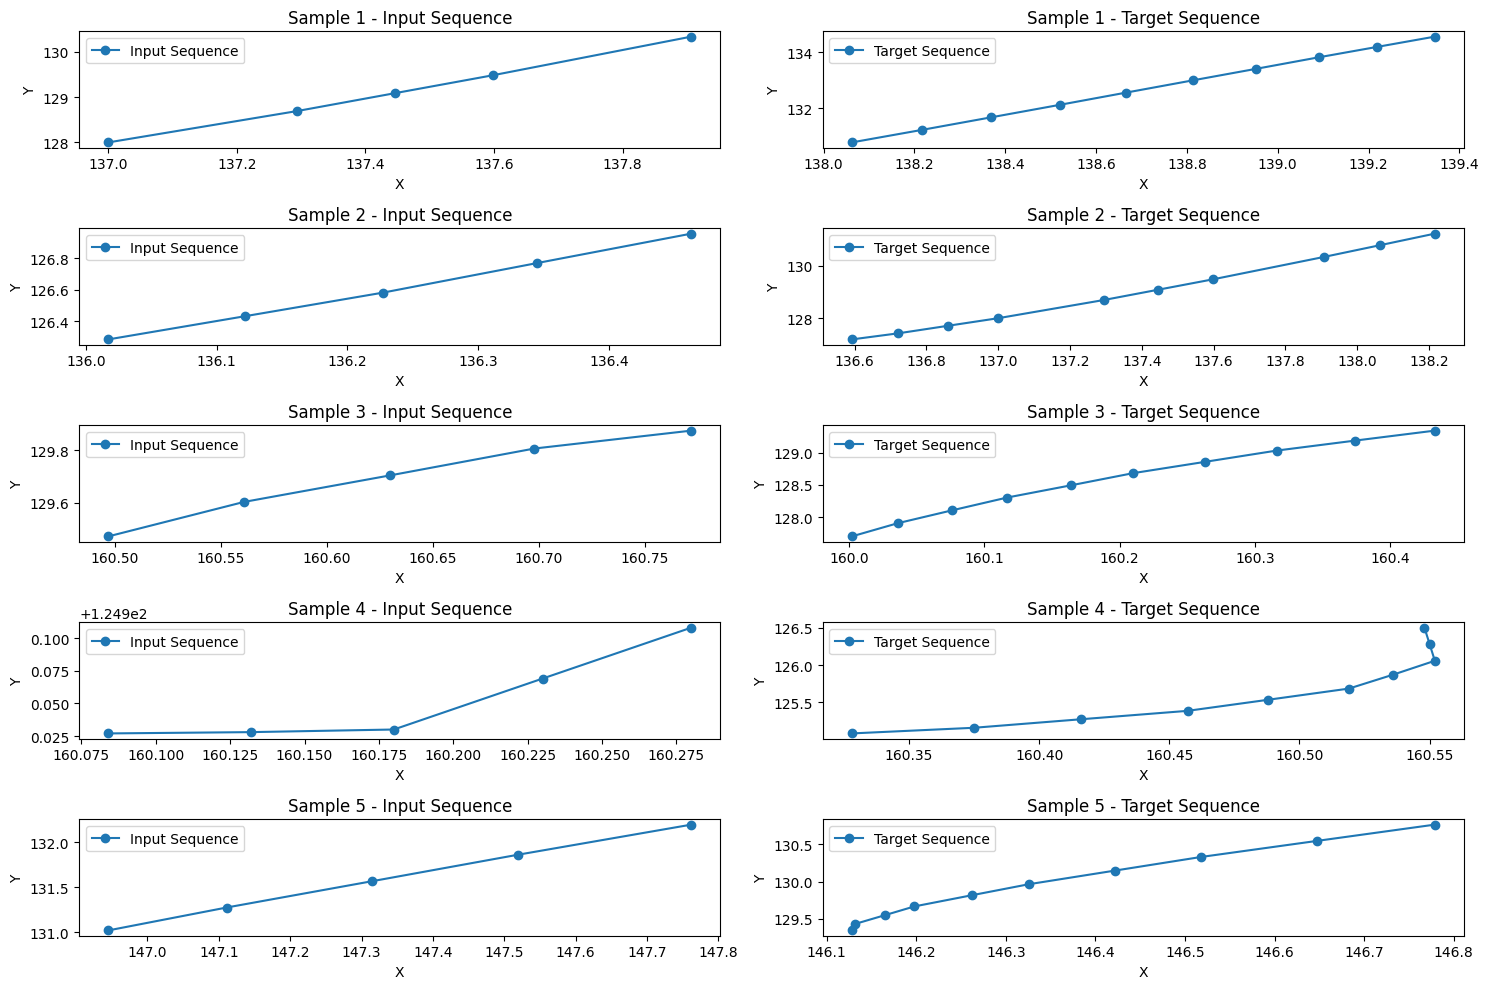

In [61]:
import matplotlib.pyplot as plt

def plot_samples(X1, y, num_samples=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        input_seq = X1[i+200]
        target_seq = y[i+200]
        
        plt.subplot(num_samples, 2, 2*i + 1)
        plt.plot(input_seq[:, 0], input_seq[:, 1], marker='o', label='Input Sequence')
        plt.title(f'Sample {i+1} - Input Sequence')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        
        plt.subplot(num_samples, 2, 2*i + 2)
        plt.plot(target_seq[:, 0], target_seq[:, 1], marker='o', label='Target Sequence')
        plt.title(f'Sample {i+1} - Target Sequence')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plot some samples
plot_samples(X1, y)


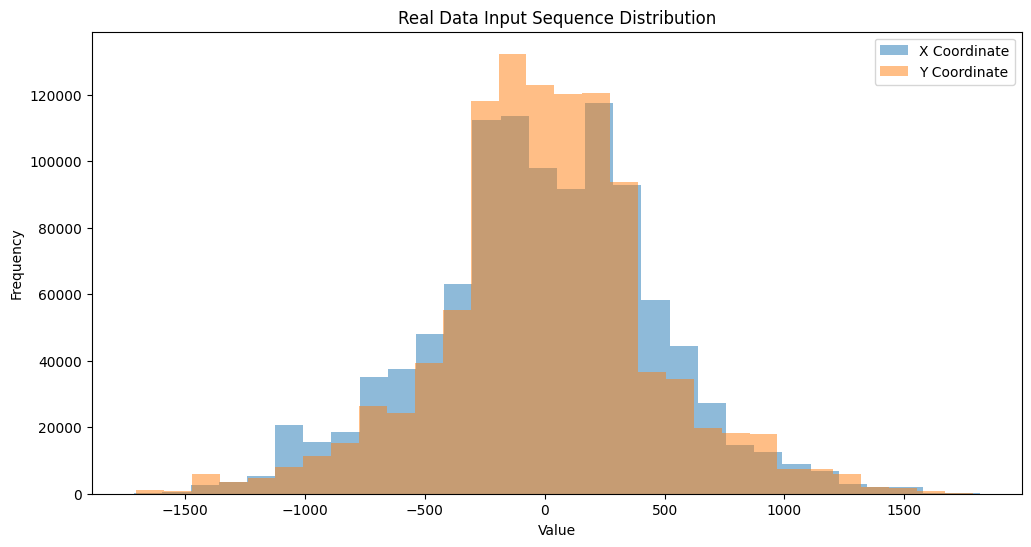

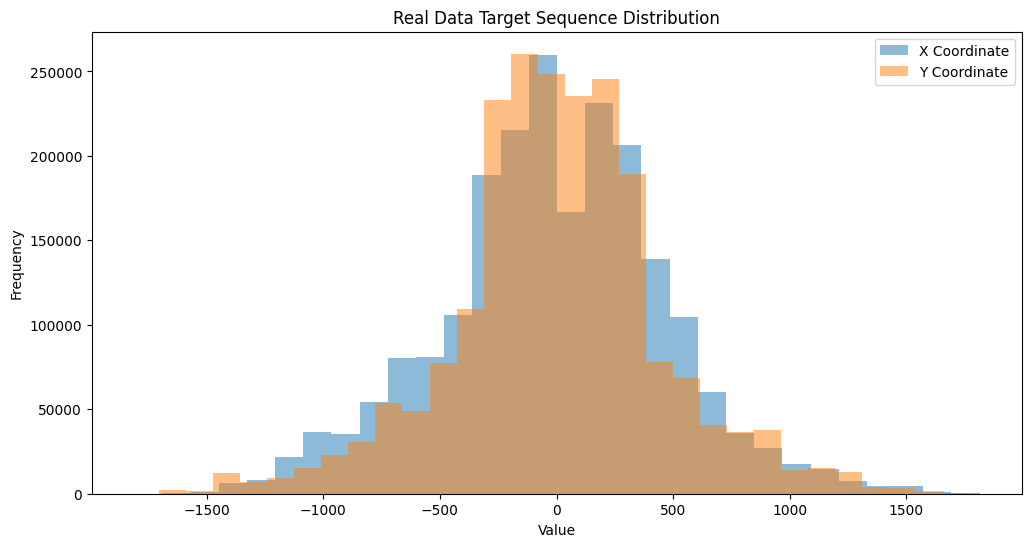

In [50]:
def plot_feature_distribution(data, title):
    plt.figure(figsize=(12, 6))
    plt.hist(data[:, :, 0].flatten(), bins=30, alpha=0.5, label='X Coordinate')
    plt.hist(data[:, :, 1].flatten(), bins=30, alpha=0.5, label='Y Coordinate')
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Plot distributions for real data
plot_feature_distribution(X1, 'Real Data Input Sequence Distribution')
plot_feature_distribution(y, 'Real Data Target Sequence Distribution')

In [73]:
from scipy.stats import zscore

Any NaNs in X1: False
Any NaNs in y: False
Number of outliers in X1: 25487
Number of outliers in y: 22854
Outlier in X1 found at sequence index 136014, feature index 0
Outlier in y found at sequence index 136014, feature index 0


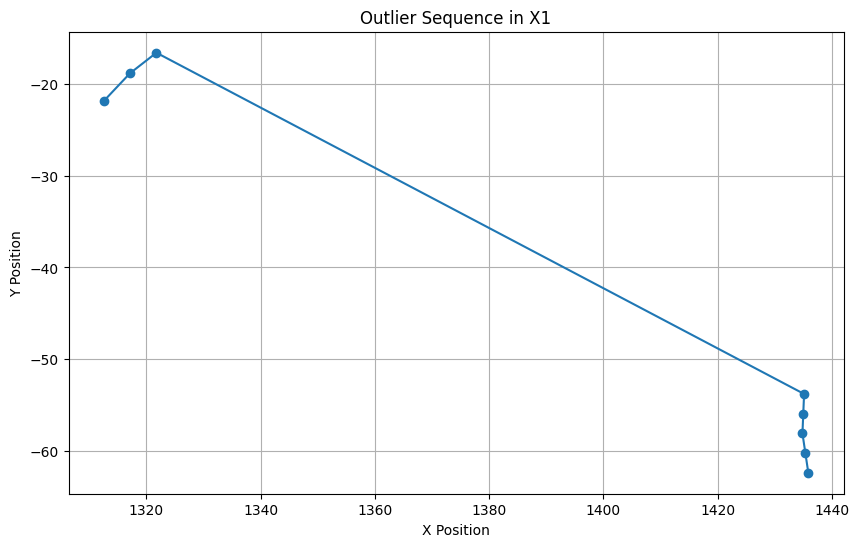

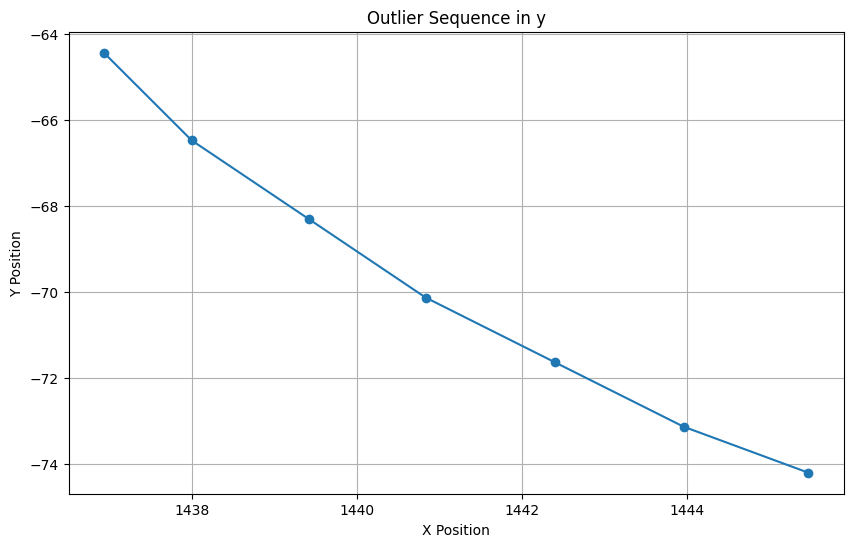

In [77]:
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

def detect_outliers(data):
    z_scores = np.abs(zscore(data.reshape(-1, data.shape[-1]), axis=0))
    outliers = np.where(z_scores > 3)
    return outliers

def get_outlier_sequence(data, outliers):
    sequence_length = data.shape[1]
    feature_index = outliers[1][0]
    sequence_index = outliers[0][0] // sequence_length  # Find the sequence index of the first outlier
    return data[sequence_index], sequence_index, feature_index

def plot_sequence(sequence, title):
    plt.figure(figsize=(10, 6))
    plt.plot(sequence[:, 0], sequence[:, 1], marker='o')
    plt.title(title)
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.grid(True)
    plt.show()

# Check for NaNs
print(f'Any NaNs in X1: {np.any(np.isnan(X1))}')
print(f'Any NaNs in y: {np.any(np.isnan(y))}')

# Detect outliers
outliers_X1 = detect_outliers(X1)
outliers_y = detect_outliers(y)

print(f'Number of outliers in X1: {len(outliers_X1[0])}')
print(f'Number of outliers in y: {len(outliers_y[0])}')

# Get and plot outlier sequences
outlier_sequence_X1, seq_index_X1, feature_index_X1 = get_outlier_sequence(X1, outliers_X1)
outlier_sequence_y, seq_index_y, feature_index_y = get_outlier_sequence(y, outliers_y)

print(f"Outlier in X1 found at sequence index {seq_index_X1}, feature index {feature_index_X1}")
print(f"Outlier in y found at sequence index {seq_index_y}, feature index {feature_index_y}")

plot_sequence(outlier_sequence_X1, 'Outlier Sequence in X1')
plot_sequence(outlier_sequence_y, 'Outlier Sequence in y')


In [79]:
def prepare_data_2d(dataset, history_steps, predict_steps):
    X1_list, y_list = [], []
    for batch_x1, _ in dataset:
        batch_x1 = batch_x1.numpy()  # Convert Tensor to NumPy array
        batch_size = batch_x1.shape[0]
        for i in range(batch_size):
            sequence = batch_x1[i]
            
            # Take only the first two dimensions (2D positions)
            sequence = sequence[:, :2]  # Ensure sequence has only 2 features
            
            if len(sequence) >= history_steps + predict_steps:
                input_seq = sequence[:history_steps]
                target_seq = sequence[history_steps:history_steps + predict_steps]
                X1_list.append(input_seq)
                y_list.append(target_seq)
    
    X1 = np.array(X1_list)
    y = np.array(y_list)
    
    return X1, y

# Prepare the data
history_steps = 5
predict_steps = 10
X1, y = prepare_data_2d(loaded, history_steps, predict_steps)
print(f"Shape of X1: {X1.shape}")  # Should be (num_samples, history_steps, 2)
print(f"Shape of y: {y.shape}")    # Should be (num_samples, predict_steps, 2)


Shape of X1: (211456, 5, 2)
Shape of y: (211456, 10, 2)


Any NaNs in full sequences: False
Number of outliers in full sequences: 48304


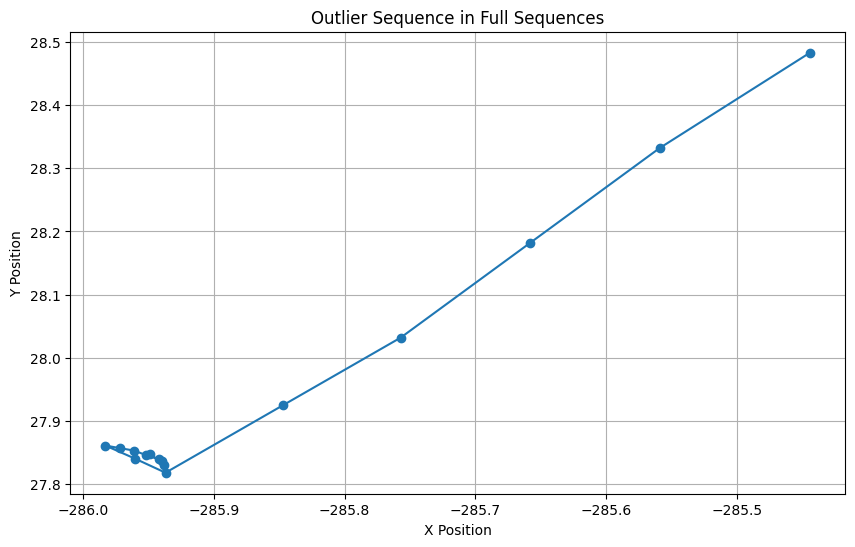

Velocity anomalies at indices: []
Acceleration anomalies at indices: []
Angle anomalies at indices: [0 6 8]


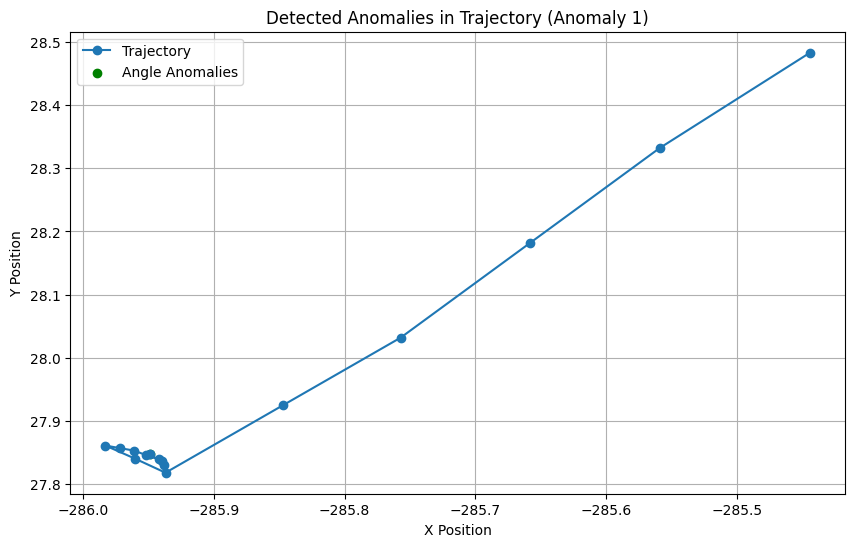

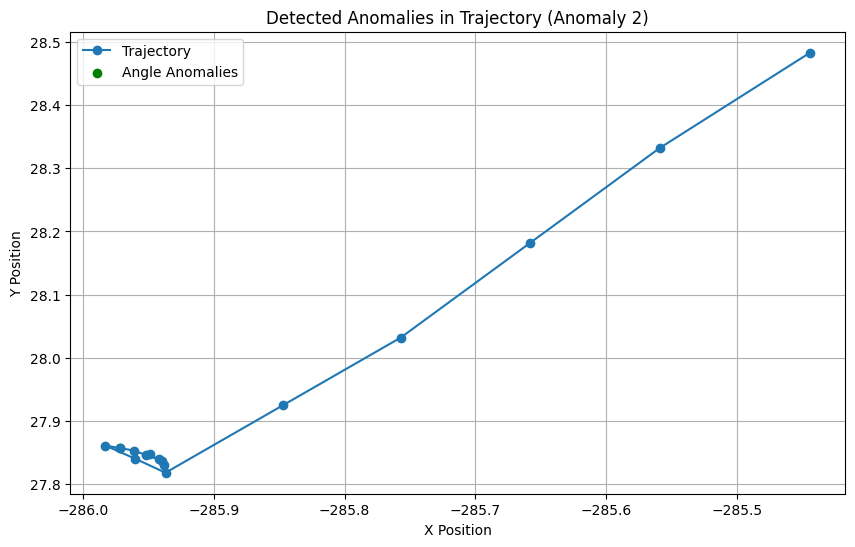

In [83]:
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

def detect_outliers(data):
    z_scores = np.abs(zscore(data.reshape(-1, data.shape[-1]), axis=0))
    outliers = np.where(z_scores > 3)
    return outliers

def get_outlier_sequence(data, outliers):
    index = outliers[0][0] // data.shape[-1]  # Find the flattened index
    sequence_index = index // data.shape[1]  # Find the sequence index
    return data[sequence_index], sequence_index

def plot_sequence(sequence, title):
    plt.figure(figsize=(10, 6))
    plt.plot(sequence[:, 0], sequence[:, 1], marker='o')
    plt.title(title)
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.grid(True)
    plt.show()

def calculate_velocity(sequence):
    velocity = np.diff(sequence, axis=0)
    return velocity

def calculate_acceleration(velocity):
    acceleration = np.diff(velocity, axis=0)
    return acceleration

def calculate_angle_between_vectors(v1, v2):
    dot_product = np.dot(v1, v2)
    mag_v1 = np.linalg.norm(v1)
    mag_v2 = np.linalg.norm(v2)
    angle = np.arccos(dot_product / (mag_v1 * mag_v2))
    return np.degrees(angle)

def calculate_angular_changes(velocity):
    angles = []
    for i in range(1, len(velocity)):
        angle = calculate_angle_between_vectors(velocity[i-1], velocity[i])
        angles.append(angle)
    return np.array(angles)

def detect_anomalies(velocity, acceleration, angles, velocity_threshold, acceleration_threshold, angle_threshold):
    velocity_anomalies = np.where(np.linalg.norm(velocity, axis=1) > velocity_threshold)[0]
    acceleration_anomalies = np.where(np.linalg.norm(acceleration, axis=1) > acceleration_threshold)[0]
    angle_anomalies = np.where(angles > angle_threshold)[0]
    
    return velocity_anomalies, acceleration_anomalies, angle_anomalies

def plot_anomalies(sequence, velocity_anomalies, acceleration_anomalies, angle_anomalies, anomaly_index):
    plt.figure(figsize=(10, 6))
    plt.plot(sequence[:, 0], sequence[:, 1], marker='o', label='Trajectory')
    if anomaly_index < len(velocity_anomalies):
        plt.scatter(sequence[velocity_anomalies[anomaly_index], 0], sequence[velocity_anomalies[anomaly_index], 1], color='red', label='Velocity Anomalies')
    if anomaly_index < len(acceleration_anomalies):
        plt.scatter(sequence[acceleration_anomalies[anomaly_index], 0], sequence[acceleration_anomalies[anomaly_index], 1], color='blue', label='Acceleration Anomalies')
    if anomaly_index < len(angle_anomalies):
        plt.scatter(sequence[angle_anomalies[anomaly_index], 0], sequence[angle_anomalies[anomaly_index], 1], color='green', label='Angle Anomalies')
    plt.title(f"Detected Anomalies in Trajectory (Anomaly {anomaly_index + 1})")
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.legend()
    plt.grid(True)
    plt.show()

# Prepare the full sequences by combining X1 and y
full_sequences = np.concatenate([X1, y], axis=1)

# Check for NaNs
print(f'Any NaNs in full sequences: {np.any(np.isnan(full_sequences))}')

# Detect outliers in the full sequences
outliers_full_sequences = detect_outliers(full_sequences)

print(f'Number of outliers in full sequences: {len(outliers_full_sequences[0])}')

# Get and plot outlier sequence
outlier_sequence_full, seq_index_full = get_outlier_sequence(full_sequences, outliers_full_sequences)

plot_sequence(outlier_sequence_full, 'Outlier Sequence in Full Sequences')

# Reconstruct full sequence
full_sequence = full_sequences[seq_index_full]

# Calculate velocity, acceleration, and angular changes
velocity = calculate_velocity(full_sequence)
acceleration = calculate_acceleration(velocity)
angles = calculate_angular_changes(velocity)

# Set thresholds
velocity_threshold = 2.0  # Example value
acceleration_threshold = 1.0  # Example value
angle_threshold = 45.0  # Example value (in degrees)

# Detect anomalies
velocity_anomalies, acceleration_anomalies, angle_anomalies = detect_anomalies(
    velocity, acceleration, angles, velocity_threshold, acceleration_threshold, angle_threshold
)

print(f"Velocity anomalies at indices: {velocity_anomalies}")
print(f"Acceleration anomalies at indices: {acceleration_anomalies}")
print(f"Angle anomalies at indices: {angle_anomalies}")

# Initialize the anomaly index
anomaly_index = 0

# Function to plot the next anomaly
def plot_next_anomaly(anomaly_index):
    global velocity_anomalies, acceleration_anomalies, angle_anomalies
    plot_anomalies(full_sequence, velocity_anomalies, acceleration_anomalies, angle_anomalies, anomaly_index)

# Plot the first anomaly
plot_next_anomaly(anomaly_index)

# Example: Plot the next anomaly
anomaly_index += 1
if anomaly_index < len(velocity_anomalies) or anomaly_index < len(acceleration_anomalies) or anomaly_index < len(angle_anomalies):
    plot_next_anomaly(anomaly_index)
else:
    print("No more anomalies to plot.")


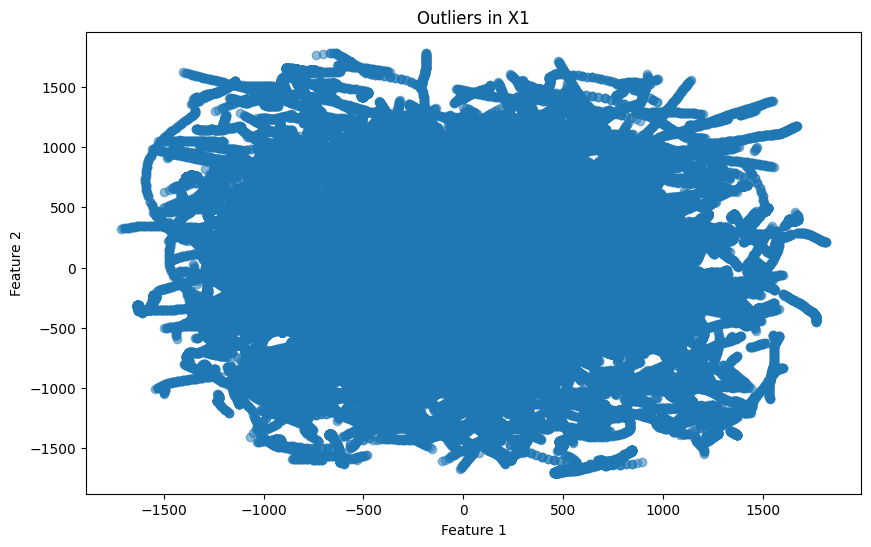

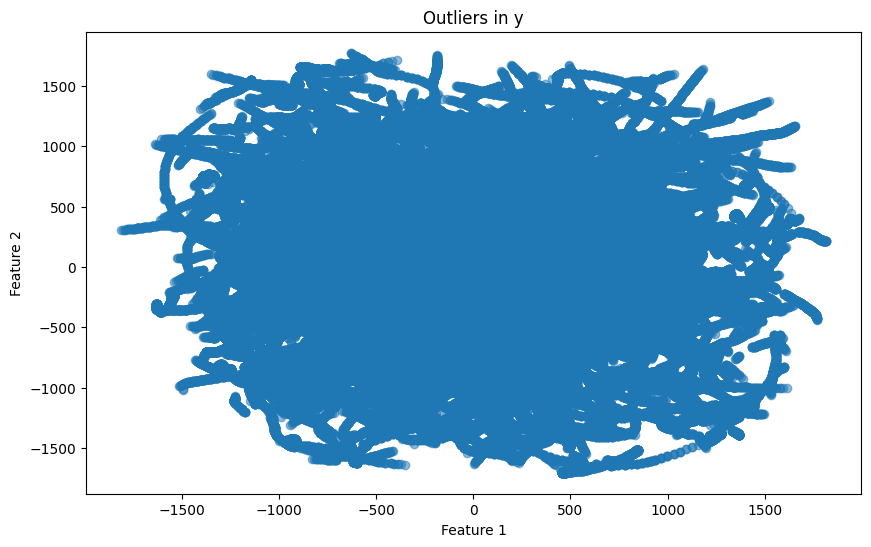

In [53]:
import matplotlib.pyplot as plt

def plot_outliers(data, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_outliers(X1.reshape(-1, 2), 'Outliers in X1')
plot_outliers(y.reshape(-1, 2), 'Outliers in y')